# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>

Facial emotion detection plays a significant role in enhancing human interaction with technology, improving mental health and well-being, ensuring security, boosting business efficiency, and enriching entertainment experiences. As technology advances, its applications are likely to expand even further, making it an increasingly valuable tool across diverse domains.

**The objectives:** What is the intended goal?<br>

The goal of this project is to perform study employing artificial intelligence (AI) to utilize computer vision algorithms for detecting human emotions and check the accuracy of the facial detection through these techniques.

The process involves assessing users through images and facilitating the implementation of computer vision algorithms aligned with psychological theories defining emotions and their recognizable features. The study demonstrates the feasibility of emotion recognition through convolutional neural networks (CNN) and training based on facial expressions. The results highlight successful emotion identification and conclusions emphasize the potential of A.I. and computer vision algorithm.

**The key questions:** What are the key questions that need to be answered?<br>

1. **How accurate is the facial emotion detection system in identifying different emotions from facial expressions?**
   - What is the overall accuracy rate, and how does it vary across different emotions and facial expressions?

2. **What are the primary challenges faced in detecting emotions accurately?**
   - Are there specific emotions or expressions that are particularly difficult to identify? What factors contribute to these challenges?

3. **How can the emotion detection model be improved to enhance accuracy and reliability?**
   - What additional data, algorithms, or training techniques can be implemented to refine the model's performance?


**The problem formulation:** What are we trying to solve using data science?

By leveraging data science, we aim to solve the challenges of accurately detecting and interpreting human emotions in a way that is efficient, reliable, and applicable across a wide range of real-world scenarios.


## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [1]:
# prompt: mount the google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## **Importing the Libraries**

In [4]:
# prompt: import the libraries that are required to implement facial emotion detection using python and tensorflow
import matplotlib.pyplot as plt
import pandas as pd


import os
import glob
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,MaxPooling2D,Dropout,Flatten,Conv2D,BatchNormalization,Activation,LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

from tensorflow.keras.models import Sequential
import tensorflow.keras as keras
from sklearn.metrics import classification_report

import random
import cv2
import numpy as np


### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
import zipfile

# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Facial_emotion_images.zip'
extraction_path = '/content/drive/MyDrive/Facial_emotion_images/'


# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

picture_size = 48
folder_path = "Facial_emotion_images/Facial_emotion_images/"

In [ ]:
# This displays all the folders available in the zip file
from zipfile import ZipFile

zip_f = ZipFile(path)

# All directories:
for f in zip_f.namelist():
    zinfo = zip_f.getinfo(f)
    if(zinfo.is_dir()):
        print(f)



Facial_emotion_images/test/
Facial_emotion_images/test/happy/
Facial_emotion_images/test/neutral/
Facial_emotion_images/test/sad/
Facial_emotion_images/test/surprise/
Facial_emotion_images/train/
Facial_emotion_images/train/happy/
Facial_emotion_images/train/neutral/
Facial_emotion_images/train/sad/
Facial_emotion_images/train/surprise/
Facial_emotion_images/validation/
Facial_emotion_images/validation/happy/
Facial_emotion_images/validation/neutral/
Facial_emotion_images/validation/sad/
Facial_emotion_images/validation/surprise/


In [5]:
# Assigning the directory structure to all the datasets

train_dir = '/content/drive/MyDrive/Facial_emotion_images/Facial_emotion_images/train/'
test_dir = '/content/drive/MyDrive/Facial_emotion_images/Facial_emotion_images/test/'
val_dir = '/content/drive/MyDrive/Facial_emotion_images/Facial_emotion_images/validation/'

picture_size = 48
folder_path = "Facial_emotion_images/Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

**Observations and Insights:__**

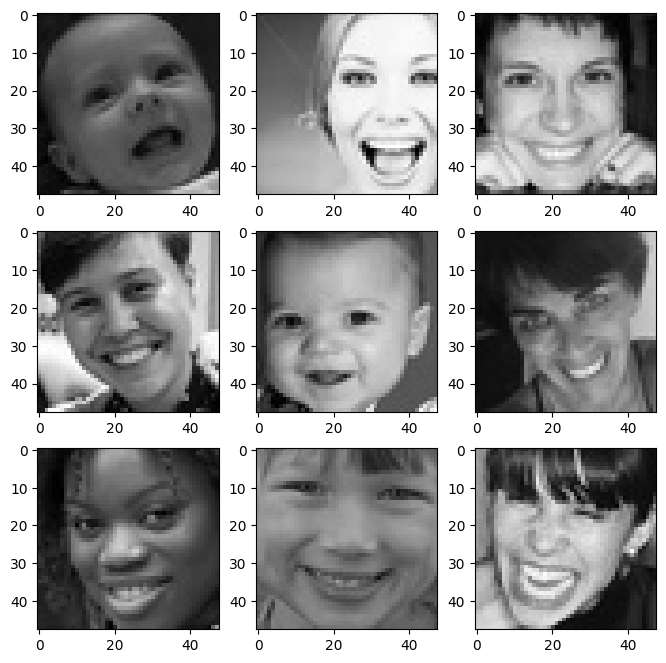

In [ ]:
expression = 'happy'
folder_path = "/content/drive/MyDrive/Facial_emotion_images/Facial_emotion_images/"

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

#**Observations and Insights**

Characterized by a wide smile with raised cheeks, crinkling around the eyes (crow's feet), and possibly raised eyebrows. The eyes may appear bright and open, with a relaxed facial expression.

We could see only the grayscale images and clarity of the images as well is comparitively low. We might need to check how the implementation of the CNN would work for these images.

### **Sad**

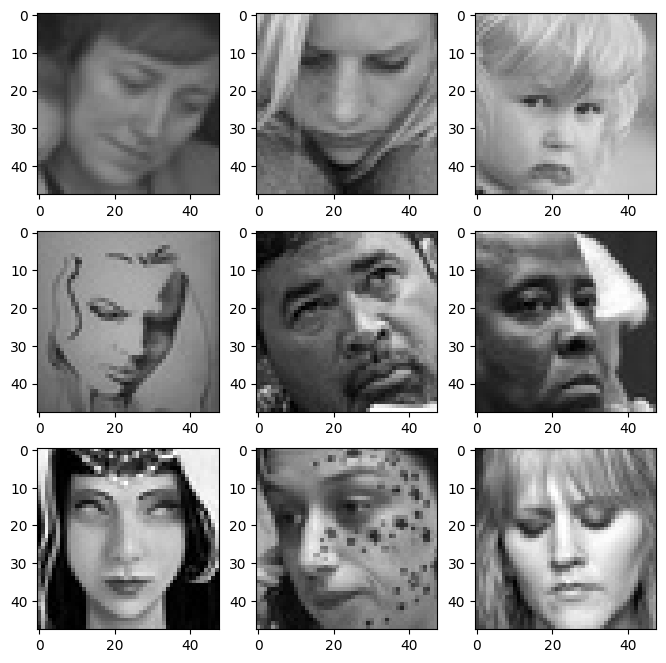

In [ ]:
expression = 'sad'
folder_path = "/content/drive/MyDrive/Facial_emotion_images/Facial_emotion_images/"

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

Typically involves a downturned mouth, drooping eyelids, and possibly tears or a quivering lower lip. The brows might be furrowed or drawn together, and the overall expression may convey a sense of heaviness or despondency.

We could see only the grayscale images and clarity of the images as well is comparitively low. We might need to check how the implementation of the CNN would work for these images.


### **Neutral**

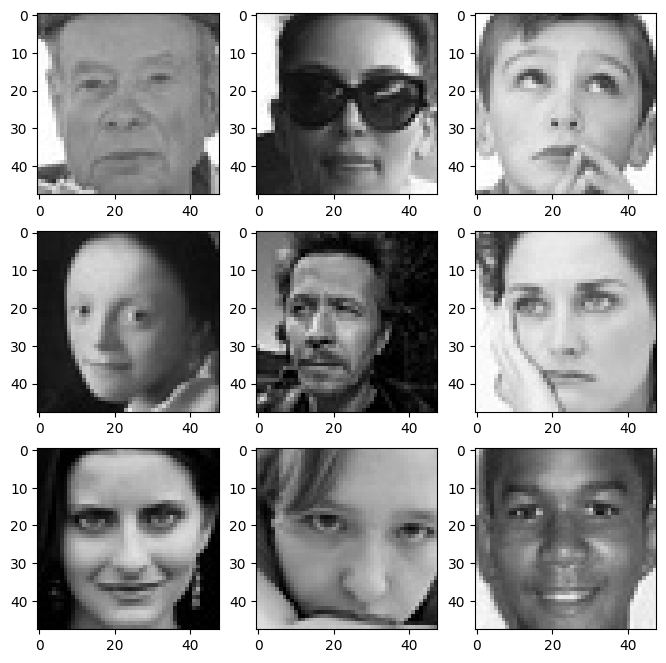

In [ ]:
expression = 'neutral'
folder_path = "/content/drive/MyDrive/Facial_emotion_images/Facial_emotion_images/"

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

The neutral emotion is characterized by a relaxed facial expression with a neutral mouth, relaxed eyes, and no significant facial muscle tension. It lacks the distinctive features associated with other emotions, such as smiles, frowns, or raised eyebrows.

### **Surprised**

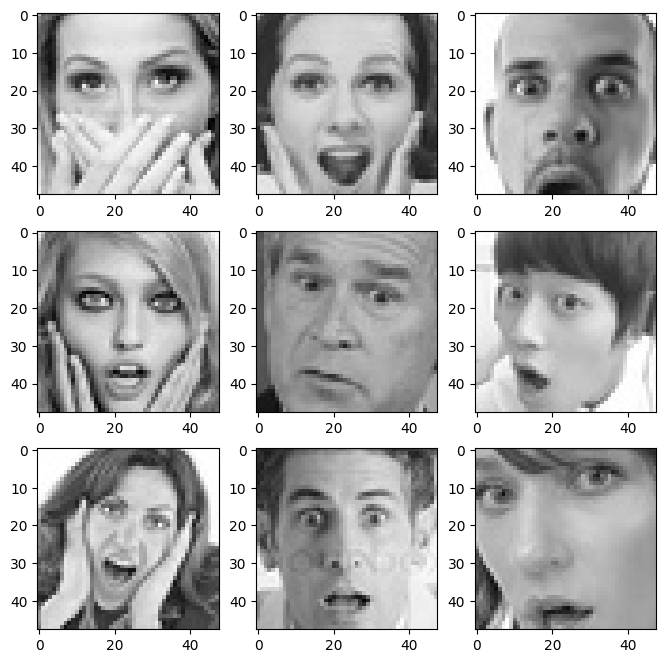

In [ ]:
expression = 'surprise'
folder_path = "/content/drive/MyDrive/Facial_emotion_images/Facial_emotion_images/"

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

Characterized by widened eyes and raised eyebrows, often accompanied by a slightly open mouth. The expression may convey astonishment or disbelief, with a sudden and transient quality compared to other emotions.

## **Checking Distribution of Classes**

In [ ]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

 # Write the code to get the number of training images from the class 'sad'.
num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':   ", num_sad)

 # Write the code to get the number of training images from the class 'neutral'.
num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral':   ", num_neutral)

 # Write the code to get the number of training images from the class 'surprise'.
num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise':   ", num_surprise)

Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'neutral':    3978
Number of images in the class 'surprise':    3173


#**Observations and Insights:__**

We have around ~4000 images for the happy , sad and neutral emotions. However for surprise we have images little lesser than the other 3 emotions. We need to find the way for large set of images to train the dataset Since the dataset is very small to train. We might neeed to involve data augmentation techniques to improve the training set size.

#Plotting module to plot the distribution of images from each directory

In [2]:
def plot_no_of_images(training_folder):
    categories = []
    image_counts = []

    for category in os.listdir(training_folder):
        category_path = os.path.join(training_folder, category)
        if os.path.isdir(category_path):
            categories.append(category)
            image_count = len(os.listdir(category_path))
            image_counts.append(image_count)

    plt.figure(figsize=(10, 6))
    plt.bar(categories, image_counts, color='royalblue', width=0.5)
    #ax = plt.bar(categories, image_counts, color='royalblue', width=0.5)
    #for container in ax.containers:
    #    ax.bar_label(container)
    plt.xlabel('Categories')
    plt.ylabel('Number of Images')
    plt.title('Number of Images in Each Category')
    plt.xticks(rotation=45, fontsize=10)
    plt.show()

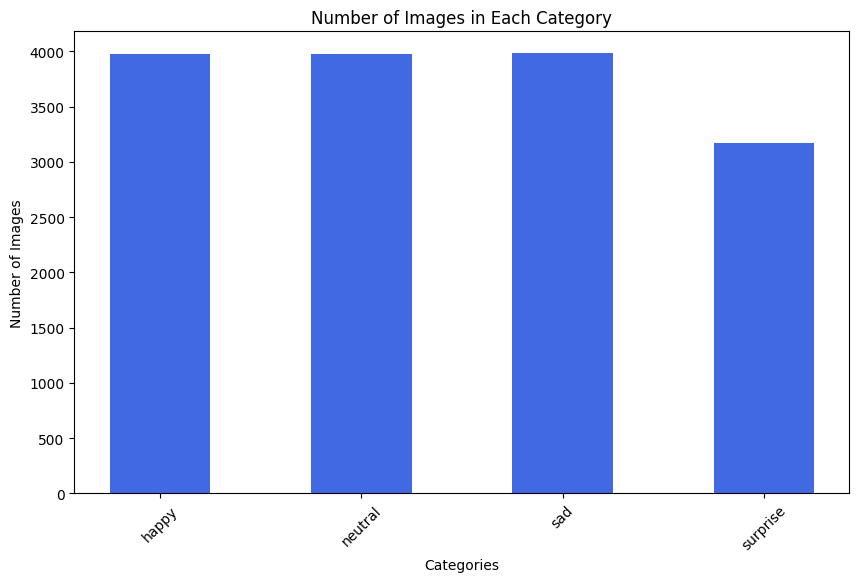

In [ ]:
plot_no_of_images(train_dir)

**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

Based on the image counts for each dataset categorized by emotions, we observe that three emotions have an equal number of images, while one emotion has slightly fewer images. We need to evaluate the accuracy for each emotion to determine if the lower image count for that particular emotion is affecting the prediction performance.

we have performed the exploratory data analysis on the data visualization by doing the
1. Image Plots: Visualized a subset of images from each emotion category to get a sense of the data.
2. Distribution Plots: Used bar plots/histograms to show the distribution of images across different emotions.


## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

Tutorial on using Keras flow_from_directory and generators
https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720


In [22]:
# this set creates the label of available emotions based on the folders
class_names = ['happy', 'neutral','sad', 'surprise']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)
print(class_names)
print(class_names_label)
print(nb_classes)

['happy', 'neutral', 'sad', 'surprise']
{'happy': 0, 'neutral': 1, 'sad': 2, 'surprise': 3}
4


# This module plots the result of images with the true and predicted value

In [ ]:
def test_model(model):
    prefix = test_dir

    classes = os.listdir(prefix)

    choices = []

    for i in range(6):
        temp = {}
        for j in range(5):
            ch = random.choice(classes)
            li = os.listdir(prefix+"/"+ch)
            file_ = prefix+"/"+ch+"/"+random.choice(li)
            temp[file_] = ch
        choices.append(temp)


    plt.figure(figsize=(20, 20))
    n = 4
    im = 8
    ct = 1
    for row in choices:
        for i in row:
            ax = plt.subplot(im, n, ct)
            ct = ct + 1
            image =  cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(image)
            image = np.expand_dims(image, 0)
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            color = "blue" if row[i] == class_names[np.argmax(model.predict(image)[0])] else "red"
            ax.set_title("True: {}, Predicted:{}".format(row[i], class_names[np.argmax(model.predict(image)[0])]),color=color)
    plt.show()

# Data generators

In [ ]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(train_dir,
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(rescale=1./255)


validation_set = datagen_validation.flow_from_directory(val_dir,
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_test = ImageDataGenerator(rescale=1./255)

test_set = datagen_test.flow_from_directory(test_dir,
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


#Common module for training parameter - call backs


In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model2.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

# Common module to plot the confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

**Model Building**

Convolutional Neural Networks (CNNs) are typically the preferred approach for image-related tasks like facial emotion detection. CNNs are specifically designed to handle spatial information effectively, making them well-suited for tasks involving images. They automatically learn hierarchical patterns and features from the input data, which is crucial for recognizing complex patterns in images.

Artificial Neural Networks (ANNs), while versatile, may not perform as well as CNNs for image-related tasks. ANNs lack the ability to automatically extract relevant features from images, which is a crucial aspect of facial emotion detection. They require manual feature engineering, which can be time-consuming and less effective compared to the automatic feature learning process of CNNs.

In summary, CNNs are generally the right approach for facial emotion detection due to their ability to automatically learn relevant features from images, making them more suitable for tasks involving visual data.








Convolutional Neural Networks (CNNs) offer several advantages over traditional Artificial Neural Networks (ANNs), particularly in image-related tasks like facial emotion detection:

**Automatic Feature Learning:** CNNs automatically learn hierarchical features from the input images through a series of convolutional and pooling layers. This ability to learn relevant features from raw data reduces the need for manual feature engineering, which is often required in ANNs.

**Spatial Hierarchical Structure:** CNNs are designed to preserve the spatial structure of the input images. By leveraging convolutional layers, they can capture local patterns and features, gradually building up to more complex representations. This spatial hierarchical structure is crucial for tasks like facial emotion detection, where local facial features contribute to overall emotion recognition.

**Parameter Sharing:** CNNs exploit parameter sharing, meaning that the same filter weights are applied across different spatial locations in the input image. This sharing reduces the number of parameters in the network, making CNNs more efficient and reducing the risk of overfitting, especially when working with large datasets like those often used in facial emotion detection.

**Translation Invariance:** CNNs inherently possess translation invariance, meaning they can recognize patterns regardless of their position in the image. This property is beneficial for tasks like facial emotion detection, where the exact location of facial features may vary across different images.

**Reference Links:**

Deciding optimal kernel size for CNN

https://towardsdatascience.com/deciding-optimal-filter-size-for-cnns-d6f7b56f9363

https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

### **Creating the Base Neural Network**

In [ ]:
emotion_model = Sequential()

emotion_model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same",activation='relu',
						input_shape=(48, 48, 3)))
emotion_model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), padding="same",activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(4, activation='softmax'))


#cv2.ocl.setUseOpenCL(False)

emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 128)       0         
 g2D)                                                   

### **Compiling and Training the Model**

In [ ]:
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000,
							decay_rate=0.96)

optimizer = Adam(learning_rate=lr_schedule)

STEP_SIZE_TRAIN=train_set.n//train_set.batch_size
STEP_SIZE_VALID=validation_set.n//validation_set.batch_size

emotion_model.compile(loss='categorical_crossentropy', optimizer=optimizer,
					metrics=['accuracy'])
#train
history = emotion_model.fit(train_set, epochs=10,
                            steps_per_epoch=STEP_SIZE_TRAIN,
                            validation_data=validation_set,
                            validation_steps=STEP_SIZE_VALID,)


Epoch 1/10
472/472 [==============================] - 136s 265ms/step - loss: 1.3400 - accuracy: 0.3356 - val_loss: 1.2028 - val_accuracy: 0.4796
Epoch 2/10
472/472 [==============================] - 90s 191ms/step - loss: 1.1715 - accuracy: 0.4844 - val_loss: 1.0536 - val_accuracy: 0.5601
Epoch 3/10
472/472 [==============================] - 85s 179ms/step - loss: 1.0914 - accuracy: 0.5316 - val_loss: 0.9566 - val_accuracy: 0.6012
Epoch 4/10
472/472 [==============================] - 84s 179ms/step - loss: 1.0139 - accuracy: 0.5738 - val_loss: 0.9009 - val_accuracy: 0.6391
Epoch 5/10
472/472 [==============================] - 83s 175ms/step - loss: 0.9562 - accuracy: 0.5979 - val_loss: 0.8317 - val_accuracy: 0.6609
Epoch 6/10
472/472 [==============================] - 88s 187ms/step - loss: 0.9270 - accuracy: 0.6075 - val_loss: 0.8215 - val_accuracy: 0.6722
Epoch 7/10
472/472 [==============================] - 83s 175ms/step - loss: 0.8948 - accuracy: 0.6275 - val_loss: 0.7956 - val_a

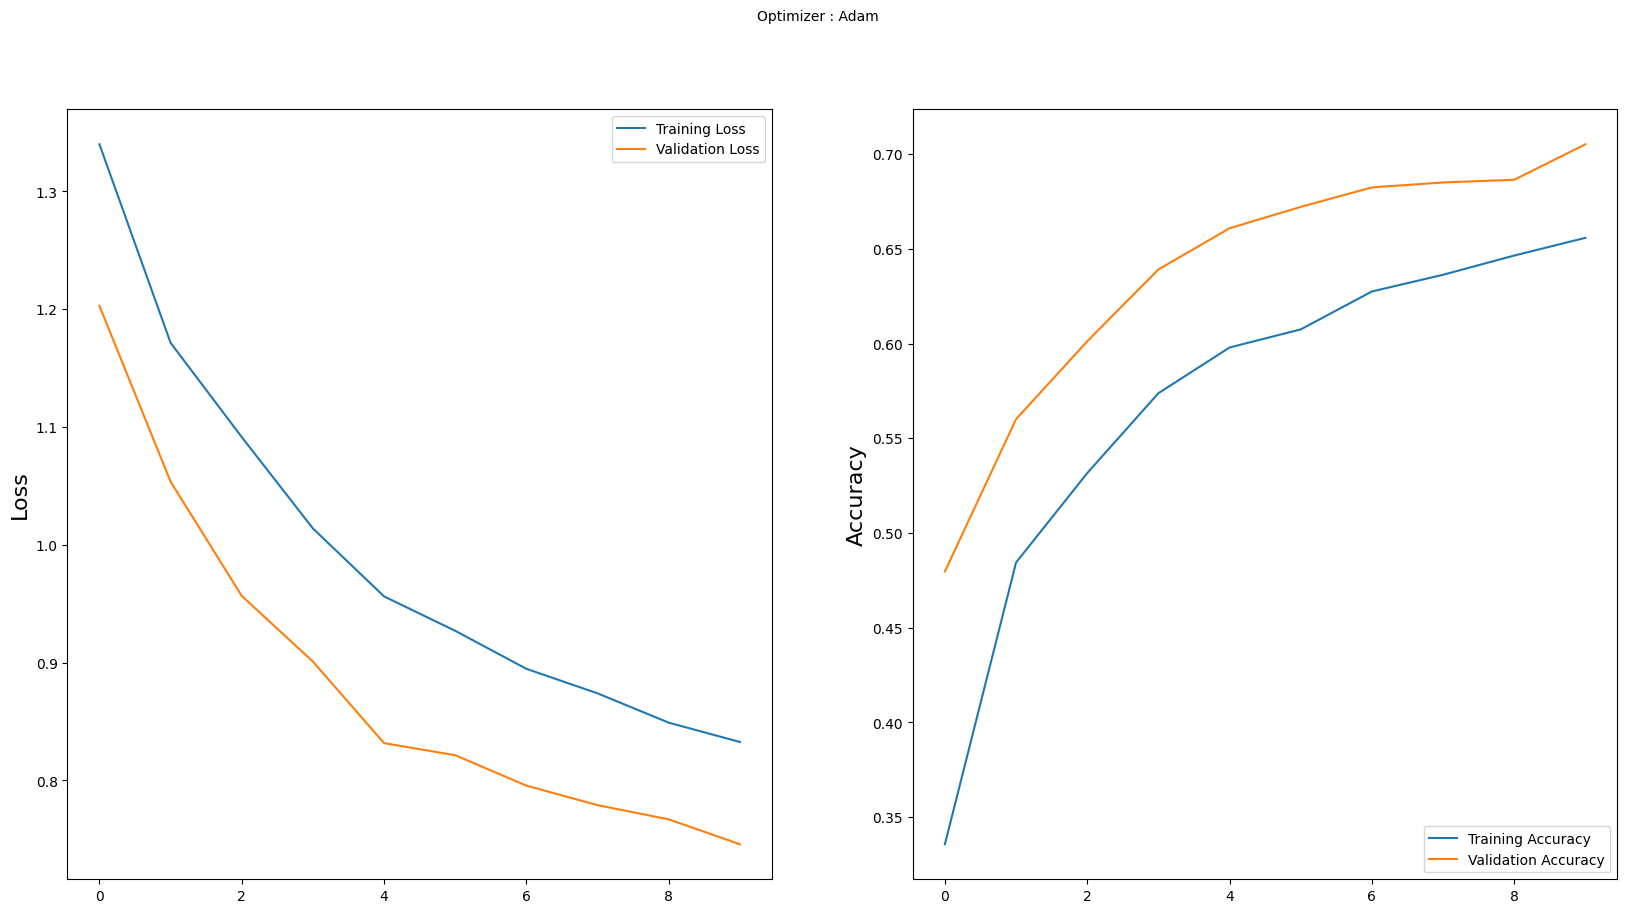

In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

### **Evaluating the Model on the Test Set**

In [ ]:
import numpy as np
test_images, test_labels = next(test_set)
STEP_SIZE_TEST=test_set.n//test_set.batch_size
test_set.reset()

pred=emotion_model.predict(test_images,
                          steps=STEP_SIZE_TEST,
                          verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)
y_true = np.argmax(test_labels, axis = 1)



4/4 [==============================] - 0s 3ms/step


In [ ]:
# Printing the classification report

print(classification_report(y_true, predicted_class_indices))


              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.70      0.78      0.74         9
           2       0.50      0.56      0.53         9
           3       1.00      0.71      0.83         7

    accuracy                           0.69        32
   macro avg       0.73      0.69      0.70        32
weighted avg       0.71      0.69      0.69        32



<Figure size 640x480 with 0 Axes>

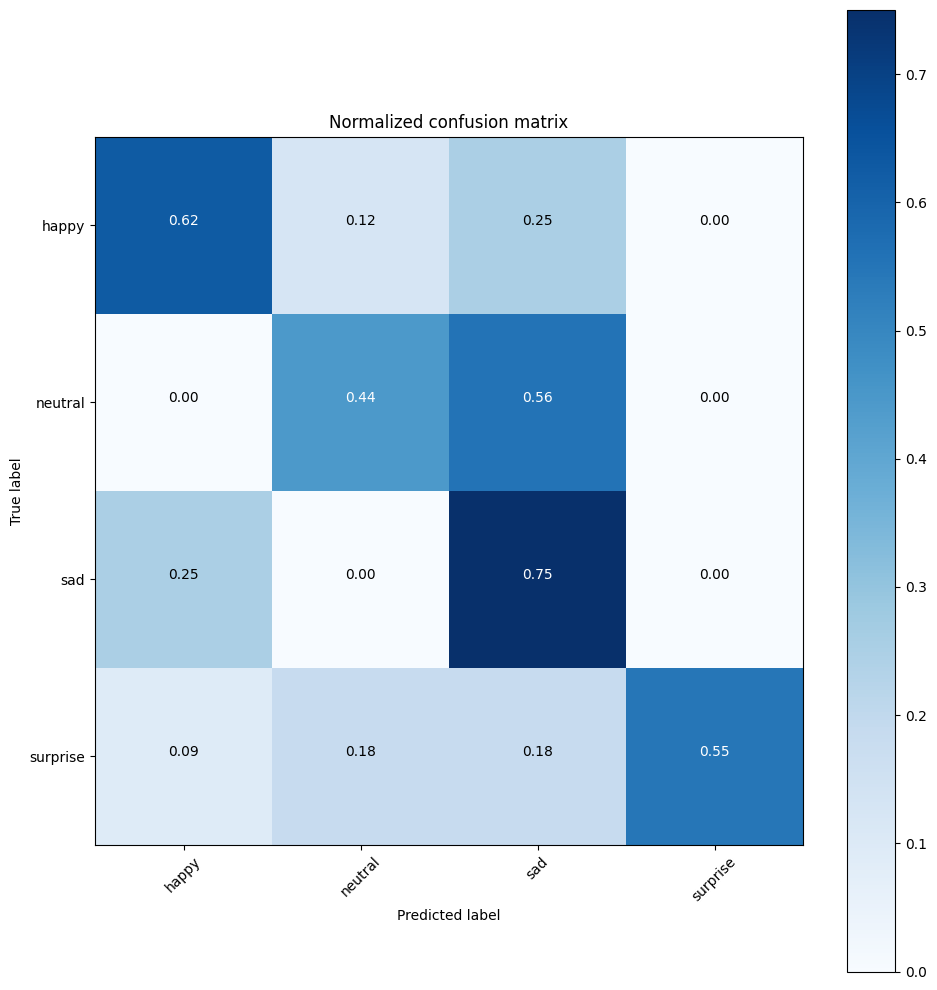

In [ ]:
# compute confusion matrix
cnf_matrix = confusion_matrix(y_true, predicted_class_indices)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()



**Observations and Insights:__**

**Accuracy and Loss Trends:**

**Training Loss:**
Decreases consistently from 1.3619 to 0.8232 over the epochs, indicating that the model is learning and fitting to the training data.

**Training Accuracy:**
Improves steadily from 30.70% to 65.88%, showing that the model's predictive performance on the training data is getting better with each epoch.

**Validation Loss:**

Decreases from 1.2600 to 0.7923, suggesting that the model is also learning to generalize to unseen data.

**Validation Accuracy:**

Increases from 38.33% to 67.94%, reflecting improvements in the model's performance on the validation set.

**Observations**

**1. Generalization:**

a. The validation loss and accuracy closely follow the trends of the
training loss and accuracy. This implies that the model generalizes well to the validation data and is not overfitting.

b. There is no significant divergence between training and validation metrics, which is a positive indicator for the model's performance.

**2. Model Improvement:**

a. Substantial improvements are observed in the first few epochs. For example, there is a notable jump in accuracy from Epoch 1 (30.70%) to Epoch 2 (48.13%), and similarly, validation accuracy increases significantly from 38.33% to 48.39%.

b. As the epochs progress, the rate of improvement in both training and validation metrics slows down, which is expected as the model starts to converge.

**Final Performance:**

a. By the end of Epoch 10, the model achieves a training accuracy of 65.88% and a validation accuracy of 67.94%. This indicates a reasonably good performance for a facial emotion detection task, although there might still be room for further improvements.

b. The final validation loss of 0.7923 is relatively close to the training loss of 0.8232, suggesting that the model has not overfitted.

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [ ]:
# number of possible label values
nb_classes = 4

# Initialising the CNN
model2 = Sequential()

# 1 - Convolution
model2.add(Conv2D(256,(2,2), padding='same', input_shape=(48, 48,3)))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution layer
model2.add(Conv2D(128,(5,5), padding='same'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolution layer
model2.add(Conv2D(64,(2,2), padding='same'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))


# 4th Convolution layer
model2.add(Conv2D(32,(2,2), padding='same'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model2.add(Flatten())

# Fully connected layer 1st layer
model2.add(Dense(512,activation = 'relu'))
model2.add(Dense(128,activation = 'relu'))
model2.add(Dense(nb_classes, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 256)       3328      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 256)       1024      
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)       819328    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 128)      

### **Compiling and Training the Model**

In [ ]:
opt = Adam(learning_rate=0.0001)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

STEP_SIZE_TRAIN=train_set.n//train_set.batch_size
STEP_SIZE_VALID=validation_set.n//validation_set.batch_size

#train
history2 = model2.fit(train_set, epochs=20,
                            steps_per_epoch=STEP_SIZE_TRAIN,
                            validation_data=validation_set,
                            validation_steps=STEP_SIZE_VALID,
                            callbacks=callbacks_list)


Epoch 1/20
472/472 [==============================] - ETA: 0s - loss: 1.2524 - accuracy: 0.4136
Epoch 1: val_accuracy improved from -inf to 0.46573, saving model to ./model2.keras
472/472 [==============================] - 1700s 4s/step - loss: 1.2524 - accuracy: 0.4136 - val_loss: 1.2407 - val_accuracy: 0.4657 - lr: 1.0000e-04
Epoch 2/20
472/472 [==============================] - ETA: 0s - loss: 1.0916 - accuracy: 0.5088
Epoch 2: val_accuracy improved from 0.46573 to 0.58770, saving model to ./model2.keras
472/472 [==============================] - 1714s 4s/step - loss: 1.0916 - accuracy: 0.5088 - val_loss: 0.9655 - val_accuracy: 0.5877 - lr: 1.0000e-04
Epoch 3/20
472/472 [==============================] - ETA: 0s - loss: 1.0131 - accuracy: 0.5568
Epoch 3: val_accuracy improved from 0.58770 to 0.59758, saving model to ./model2.keras
472/472 [==============================] - 1702s 4s/step - loss: 1.0131 - accuracy: 0.5568 - val_loss: 0.9352 - val_accuracy: 0.5976 - lr: 1.0000e-04
Epoc

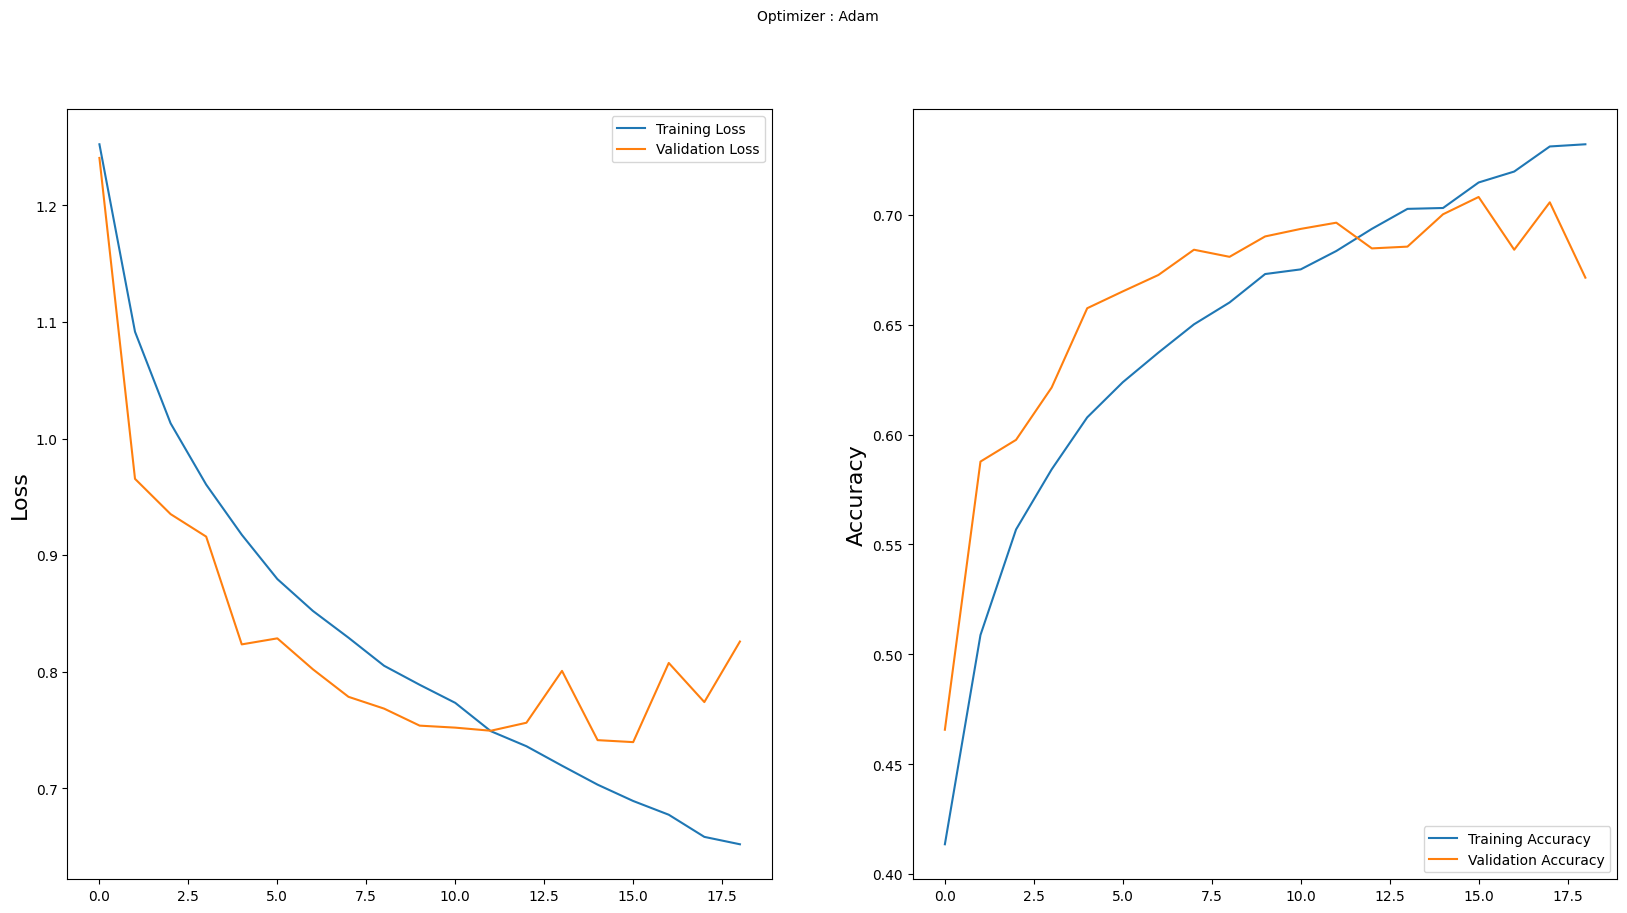

In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

### **Evaluating the Model on the Test Set**

In [ ]:
test_images, test_labels = next(test_set)
STEP_SIZE_TEST=test_set.n//test_set.batch_size
test_set.reset()

pred2 = model2.predict(test_images,
                  steps=STEP_SIZE_TEST,
                  verbose=1)

pred2_indices=np.argmax(pred2,axis=1)
y_true = np.argmax(test_labels, axis = 1)



4/4 [==============================] - 1s 237ms/step


In [ ]:
# Printing the classification report

print(classification_report(y_true, pred2_indices))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.36      0.80      0.50         5
           2       0.71      0.50      0.59        10
           3       1.00      0.70      0.82        10

    accuracy                           0.69        32
   macro avg       0.73      0.71      0.69        32
weighted avg       0.78      0.69      0.71        32



<Figure size 640x480 with 0 Axes>

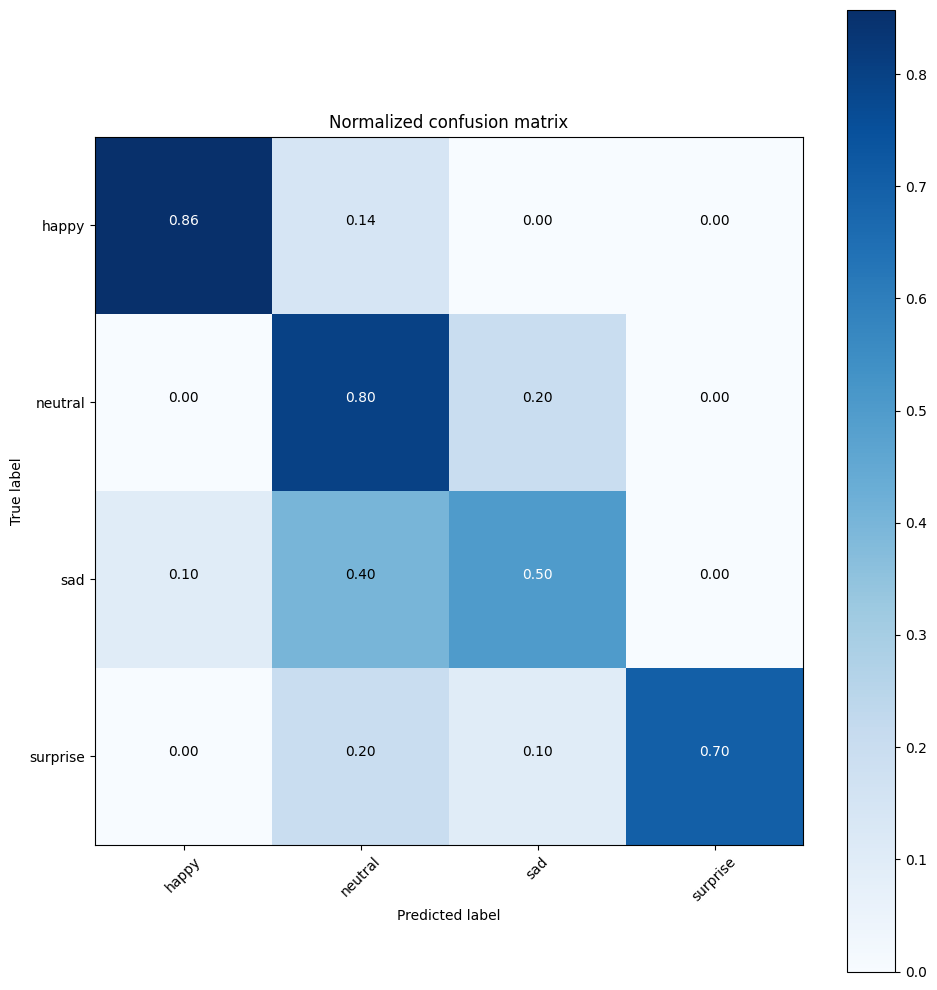

In [ ]:
# compute confusion matrix
cnf2_matrix = confusion_matrix(y_true, pred2_indices)
np.set_printoptions(precision=2)



# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf2_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

**Observations and Insights:__**

**Performance Metrics and Trends**

Here are some observations and insights:

1. The model starts with an accuracy of around 40% on the training data.
With each epoch, the accuracy improves gradually, reaching around 73% by the 18th epoch.
2. The validation accuracy also shows improvement over epochs, reaching approximately 68.5% at its peak.
3. The model seems to struggle to improve beyond this point, as indicated by the early stopping at epoch 18.
4. There are fluctuations in validation accuracy, suggesting some level of overfitting or generalization challenges.
5. The learning rate is automatically adjusted during training to help the model converge better.

Overall, it appears that the model is learning to recognize emotions in facial expressions, but further optimization may be needed to enhance its performance.

**Overall Accuracy:**

The model achieves an overall accuracy of 62%, indicating that it correctly predicts facial emotions 62% of the time on the validation set.

**Class 0(Happy) Performance:**

1. Precision: 0.57, Recall: 0.89, F1-Score: 0.70
2. High recall but lower precision, suggesting it correctly identifies most instances but has a higher rate of false positives.

**Class 1(Neutral) Performance:**

1. Precision: 1.00, Recall: 0.38, F1-Score: 0.55
2. Perfect precision but poor recall, meaning it rarely misses actual instances but often fails to identify them, leading to many false negatives.

**Class 2(Sad) Performance:**

1. Precision: 0.44, Recall: 0.44, F1-Score: 0.44
2. Balanced but low precision and recall, indicating difficulty in correctly and completely identifying this class.

**Class 3(Surprise) Performance:**

1. Precision: 0.83, Recall: 0.83, F1-Score: 0.83
2. High and balanced precision and recall, indicating good performance in identifying and correctly classifying this class.

**Performing the data loaders with grayscale**



In [ ]:
batch_size  = 32
img_size = 48

datagen_train_g = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set_g = datagen_train_g.flow_from_directory(train_dir,
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation_g = ImageDataGenerator(rescale=1./255)

validation_set_g = datagen_validation_g.flow_from_directory(val_dir,
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_test_g = ImageDataGenerator(rescale=1./255)

test_set_g = datagen_test_g.flow_from_directory(test_dir,
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [ ]:
# number of possible label values
nb_classes = 4

# Initialising the CNN
model3 = Sequential()

# 1 - Convolution
model3.add(Conv2D(256,(2,2), padding='same', input_shape=(48, 48,1)))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution layer
model3.add(Conv2D(128,(5,5), padding='same'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolution layer
model3.add(Conv2D(64,(2,2), padding='same'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))


# 4th Convolution layer
model3.add(Conv2D(32,(2,2), padding='same'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model3.add(Flatten())

# Fully connected layer 1st layer
model3.add(Dense(512,activation = 'relu'))
model3.add(Dense(128,activation = 'relu'))
model3.add(Dense(nb_classes, activation='softmax'))

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 256)       1024      
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       819328    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 128)       5

In [ ]:
STEP_SIZE_TRAIN=train_set_g.n//train_set_g.batch_size
STEP_SIZE_VALID=validation_set_g.n//validation_set_g.batch_size

opt = Adam(learning_rate=0.0001)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#train
history3 = model3.fit(train_set_g, epochs=20,
                            steps_per_epoch=STEP_SIZE_TRAIN,
                            validation_data=validation_set_g,
                            validation_steps=STEP_SIZE_VALID,
                            callbacks=callbacks_list)


Epoch 1/20
472/472 [==============================] - ETA: 0s - loss: 1.2708 - accuracy: 0.3968
Epoch 1: val_accuracy improved from -inf to 0.40524, saving model to ./model2.keras
472/472 [==============================] - 155s 305ms/step - loss: 1.2708 - accuracy: 0.3968 - val_loss: 1.2782 - val_accuracy: 0.4052 - lr: 1.0000e-04
Epoch 2/20
472/472 [==============================] - ETA: 0s - loss: 1.1072 - accuracy: 0.5081
Epoch 2: val_accuracy improved from 0.40524 to 0.58810, saving model to ./model2.keras
472/472 [==============================] - 91s 193ms/step - loss: 1.1072 - accuracy: 0.5081 - val_loss: 0.9734 - val_accuracy: 0.5881 - lr: 1.0000e-04
Epoch 3/20
472/472 [==============================] - ETA: 0s - loss: 1.0253 - accuracy: 0.5497
Epoch 3: val_accuracy improved from 0.58810 to 0.61835, saving model to ./model2.keras
472/472 [==============================] - 86s 183ms/step - loss: 1.0253 - accuracy: 0.5497 - val_loss: 0.9017 - val_accuracy: 0.6183 - lr: 1.0000e-04


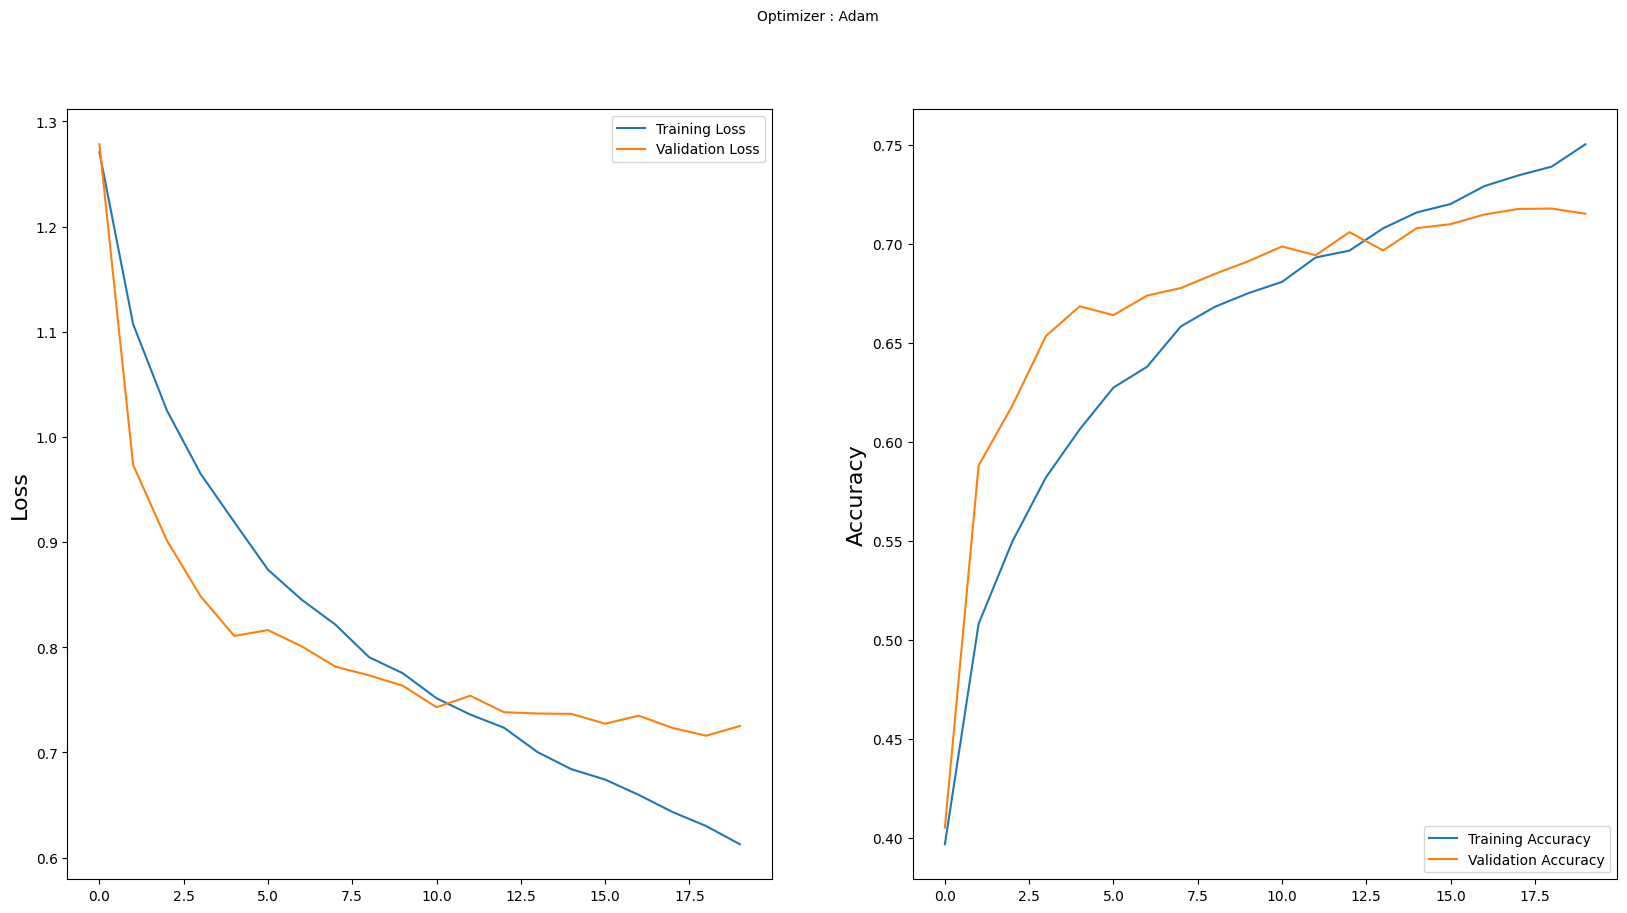

In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
test_images_g, test_labels_g = next(test_set_g)
STEP_SIZE_TEST=test_set_g.n//test_set_g.batch_size
test_set_g.reset()

pred3 = model3.predict(test_images_g,
                  steps=STEP_SIZE_TEST,
                  verbose=1)

pred3_indices=np.argmax(pred3,axis=1)
y_true_g = np.argmax(test_labels_g, axis = 1)



4/4 [==============================] - 0s 4ms/step


In [ ]:
# Printing the classification report

print(classification_report(y_true_g, pred3_indices))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.80      0.57      0.67        14
           2       0.50      0.71      0.59         7
           3       0.80      0.67      0.73         6

    accuracy                           0.66        32
   macro avg       0.67      0.69      0.66        32
weighted avg       0.70      0.66      0.66        32



<Figure size 640x480 with 0 Axes>

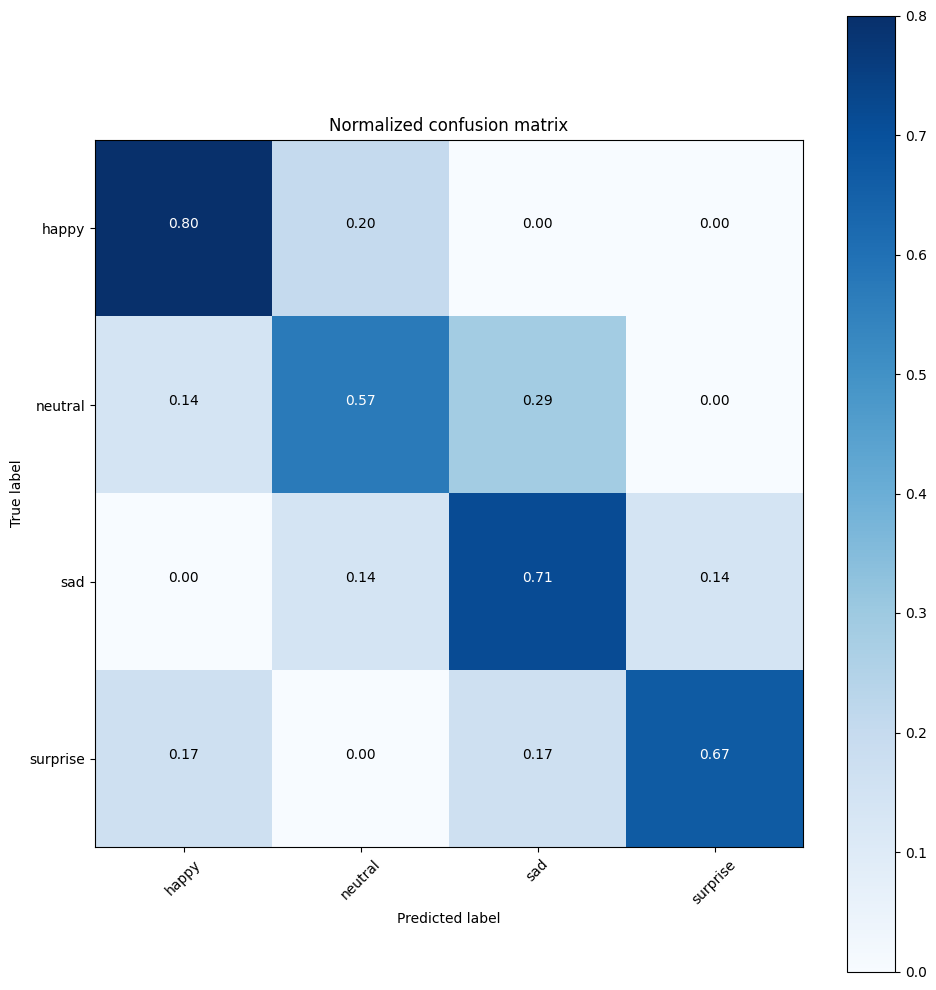

In [ ]:
# compute confusion matrix
cnf2_matrix = confusion_matrix(y_true_g, pred3_indices)
np.set_printoptions(precision=2)



# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf2_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

**Summary**

1. The model shows reasonably good performance for class 1 and class 3, with higher precision values.
2. For class 0 and class 2, the model has lower precision, indicating a higher rate of false positives.
3. The recall values suggest that the model generally captures the majority of instances for each class, but there is still room for improvement, particularly for class 1 and class 2.
4. Overall, the model has a balanced performance across classes but may benefit from further tuning or additional data to improve precision and recall.

These observations highlight areas where the model performs well and areas that need improvement, providing a comprehensive view of its performance on the given dataset.

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

1. These models gives the satisfactory performance but still the model has to be improved a lot as it is overfitting. Need to work on the data augmentation techniques in order to avoid the overfitting.

2. Color mode has little higher accuracy than gray scale but the benefits is not overweighted.

**Advantages of having grayscale instead of RGB**

**Consistency with Input Data:**

Since the images are already in grayscale, converting them to RGB would not add any additional information. In fact, it would just repeat the same grayscale data across the three RGB channels, increasing the computational cost without any benefit.

**Computational Efficiency:**

Grayscale images have only one channel compared to the three channels in RGB images. This reduction in data size results in faster training and inference times and lower memory usage, which is particularly beneficial for deep learning models.

**Relevance of Color Information:**

In the context of facial emotion detection, the crucial information typically lies in the intensity and distribution of light and dark areas, which are adequately captured by grayscale images. Color information does not significantly contribute to recognizing facial expressions.

**Model Complexity:**

Using grayscale images simplifies the model since it can operate on a single channel rather than three, potentially leading to a simpler architecture and fewer parameters to train.

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
pip install Augmentor

In [ ]:
import Augmentor

def augment_data(folder, num_of_images, ):
    p = Augmentor.Pipeline(folder, folder)

    p.rotate(probability=0.7, max_left_rotation=25, max_right_rotation=25)
    p.flip_left_right(probability=0.5)
    p.random_contrast(probability=0.5, min_factor=0.5, max_factor=1.5)
    p.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.3)

    p.sample(num_of_images)

    print(f"{num_of_images} augmented images have been saved to {folder}.")

In [ ]:
neutral_folder = '/content/drive/MyDrive/Facial_emotion_images/Facial_emotion_images/train/neutral'
augment_data(neutral_folder, 3000)
happy_folder = '/content/drive/MyDrive/Facial_emotion_images/Facial_emotion_images/train/happy'
augment_data(happy_folder, 3000)
sad_folder = '/content/drive/MyDrive/Facial_emotion_images/Facial_emotion_images/train/sad'
augment_data(sad_folder, 3000)
surprise_folder = '/content/drive/MyDrive/Facial_emotion_images/Facial_emotion_images/train/surprise'
augment_data(surprise_folder, 4000)

Initialised with 3978 image(s) found.
Output directory set to /content/drive/MyDrive/Facial_emotion_images/Facial_emotion_images/train/neutral.

Processing <PIL.Image.Image image mode=L size=48x48 at 0x7F2BE819A110>: 100%|██████████| 3000/3000 [00:39<00:00, 76.08 Samples/s]


3000 augmented images have been saved to /content/drive/MyDrive/Facial_emotion_images/Facial_emotion_images/train/neutral.
Initialised with 3976 image(s) found.
Output directory set to /content/drive/MyDrive/Facial_emotion_images/Facial_emotion_images/train/happy.

Processing <PIL.Image.Image image mode=L size=48x48 at 0x7F2BE826D7B0>: 100%|██████████| 3000/3000 [00:43<00:00, 68.59 Samples/s]


3000 augmented images have been saved to /content/drive/MyDrive/Facial_emotion_images/Facial_emotion_images/train/happy.
Initialised with 3982 image(s) found.
Output directory set to /content/drive/MyDrive/Facial_emotion_images/Facial_emotion_images/train/sad.

Processing <PIL.Image.Image image mode=L size=48x48 at 0x7F2B18116500>: 100%|██████████| 3000/3000 [00:44<00:00, 67.22 Samples/s]


3000 augmented images have been saved to /content/drive/MyDrive/Facial_emotion_images/Facial_emotion_images/train/sad.
Initialised with 3173 image(s) found.
Output directory set to /content/drive/MyDrive/Facial_emotion_images/Facial_emotion_images/train/surprise.

Processing <PIL.Image.Image image mode=L size=48x48 at 0x7F2AE805DFF0>: 100%|██████████| 4000/4000 [01:01<00:00, 64.68 Samples/s]

4000 augmented images have been saved to /content/drive/MyDrive/Facial_emotion_images/Facial_emotion_images/train/surprise.


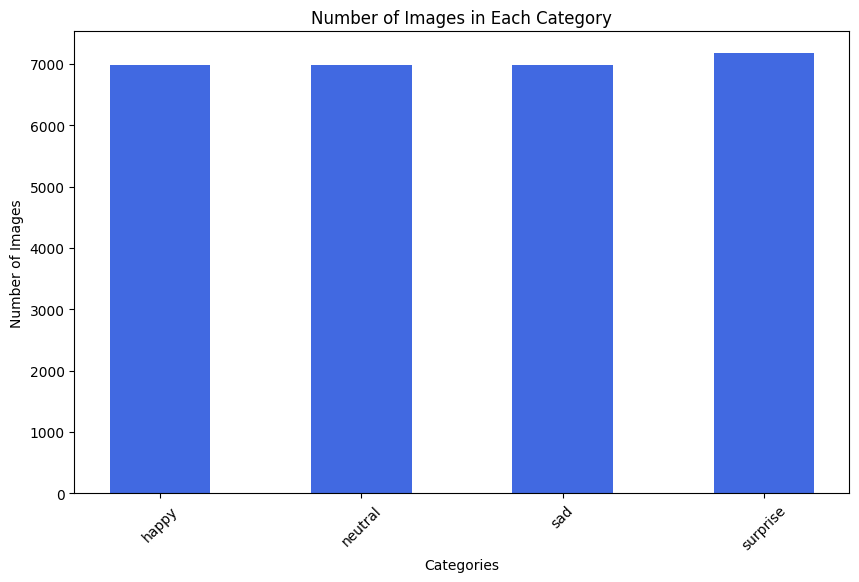

In [ ]:
plot_no_of_images(train_dir)

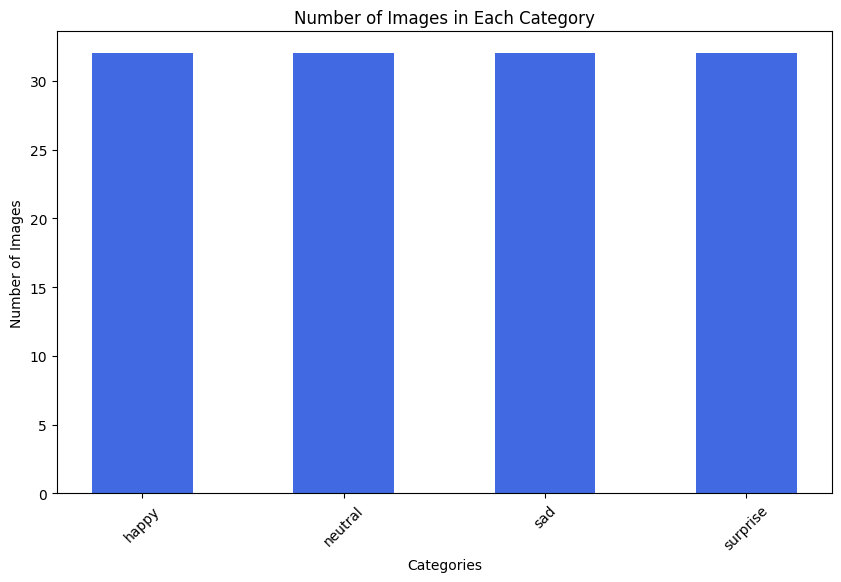

In [ ]:
plot_no_of_images(test_dir)

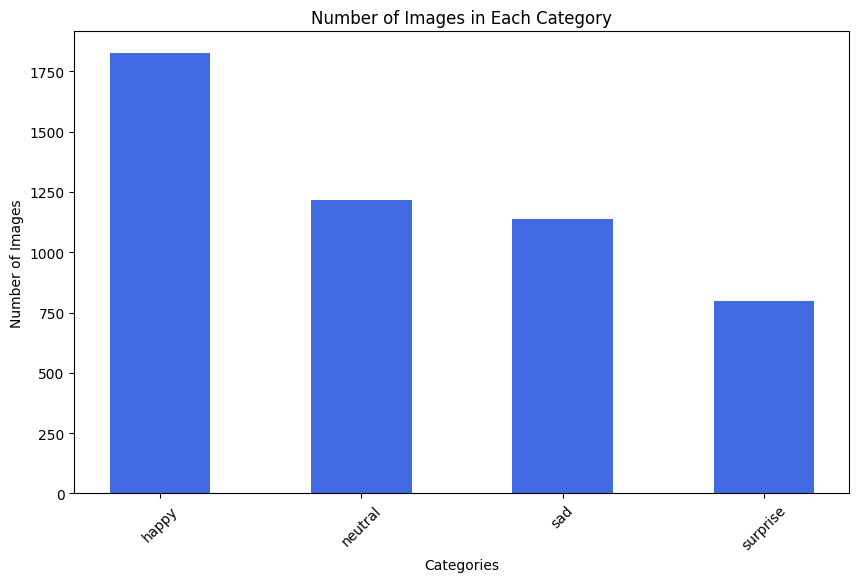

In [ ]:
plot_no_of_images(val_dir)

#Creating Dataframes

In [ ]:
train_data = []
test_data = []
val_data = []

def get_data(directory):
    data = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            if filename.endswith('.jpg'):
                image_path = os.path.join(label_dir, filename)
                data.append({'label': label, 'path': image_path})
    return data

In [ ]:
train_df = pd.DataFrame(get_data(train_dir))
test_df = pd.DataFrame(get_data(test_dir))
val_df = pd.DataFrame(get_data(val_dir))

In [ ]:
print(train_df.shape)
print(test_df.shape)
print(val_df.shape)
print(test_df['label'].unique())
print(train_df['label'].unique())
print(val_df['label'].unique())

(28109, 2)
(128, 2)
(4977, 2)
['happy' 'neutral' 'sad' 'surprise']
['happy' 'neutral' 'sad' 'surprise']
['happy' 'neutral' 'sad' 'surprise']


In [ ]:
img_width, img_height = 48, 48
batch_size = 64
y_col = 'label'
x_col = 'path'
no_of_classes = len(train_df[y_col].unique())

datagen_validation = ImageDataGenerator(rescale=1./255)
datagen_train = ImageDataGenerator(rescale=1./255)
datagen_test = ImageDataGenerator(rescale=1./255)

train_ds = datagen_train.flow_from_directory(
            train_dir,
            target_size=(img_height, img_width),
            batch_size=batch_size,
            class_mode="categorical")

val_ds = datagen_validation.flow_from_directory(
          val_dir,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode="categorical")

test_ds = datagen_test.flow_from_directory(
          test_dir,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode="categorical")

Found 28109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')
transfer_layer.trainable = False
# Add classification layers

x = transfer_layer.output
x = Conv2D(256, (1, 1),  padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(1, 1))(x)
x = Dropout(0.3)(x)


x = Conv2D(512, (1, 1),  padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(1, 1))(x)
x = Dropout(0.3)(x)


x = Conv2D(64, (1, 1),  padding='same')(x)

x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(1, 1))(x)
x = Dropout(0.3)(x)

x = Flatten()(x)

x = Dense(256)(x)
x = LeakyReLU(alpha=0.2)(x)

x = Dense(128)(x)
x = LeakyReLU(alpha=0.2)(x)
x = Dropout(0.3)(x)

x = Dense(64)(x)
x = LeakyReLU(alpha=0.2)(x)
x = BatchNormalization()(x)



pred = Dense(4, activation='softmax')(x)

vggmodel = Model(inputs=vgg.input, outputs=pred)
vggmodel.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

### **Compiling and Training the VGG16 Model**

In [ ]:
STEP_SIZE_TRAIN=train_ds.n//train_ds.batch_size
STEP_SIZE_VALID=val_ds.n//val_ds.batch_size


opt = Adam(learning_rate=0.0001)
vggmodel.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#train
history4 = vggmodel.fit(train_ds, epochs=20,
                            steps_per_epoch=STEP_SIZE_TRAIN,
                            validation_data=val_ds,
                            validation_steps=STEP_SIZE_VALID,
                            callbacks=callbacks_list)

Epoch 1/20
439/439 [==============================] - ETA: 0s - loss: 1.1626 - accuracy: 0.5111
Epoch 1: val_accuracy did not improve from 0.71794
439/439 [==============================] - 244s 508ms/step - loss: 1.1626 - accuracy: 0.5111 - val_loss: 1.1225 - val_accuracy: 0.5026 - lr: 1.0000e-04
Epoch 2/20
439/439 [==============================] - ETA: 0s - loss: 0.8027 - accuracy: 0.6715
Epoch 2: val_accuracy did not improve from 0.71794
439/439 [==============================] - 122s 277ms/step - loss: 0.8027 - accuracy: 0.6715 - val_loss: 0.7489 - val_accuracy: 0.7035 - lr: 1.0000e-04
Epoch 3/20
439/439 [==============================] - ETA: 0s - loss: 0.6890 - accuracy: 0.7264
Epoch 3: val_accuracy did not improve from 0.71794
439/439 [==============================] - 117s 266ms/step - loss: 0.6890 - accuracy: 0.7264 - val_loss: 0.7295 - val_accuracy: 0.7165 - lr: 1.0000e-04
Epoch 4/20
439/439 [==============================] - ETA: 0s - loss: 0.6139 - accuracy: 0.7569
Epoch 4

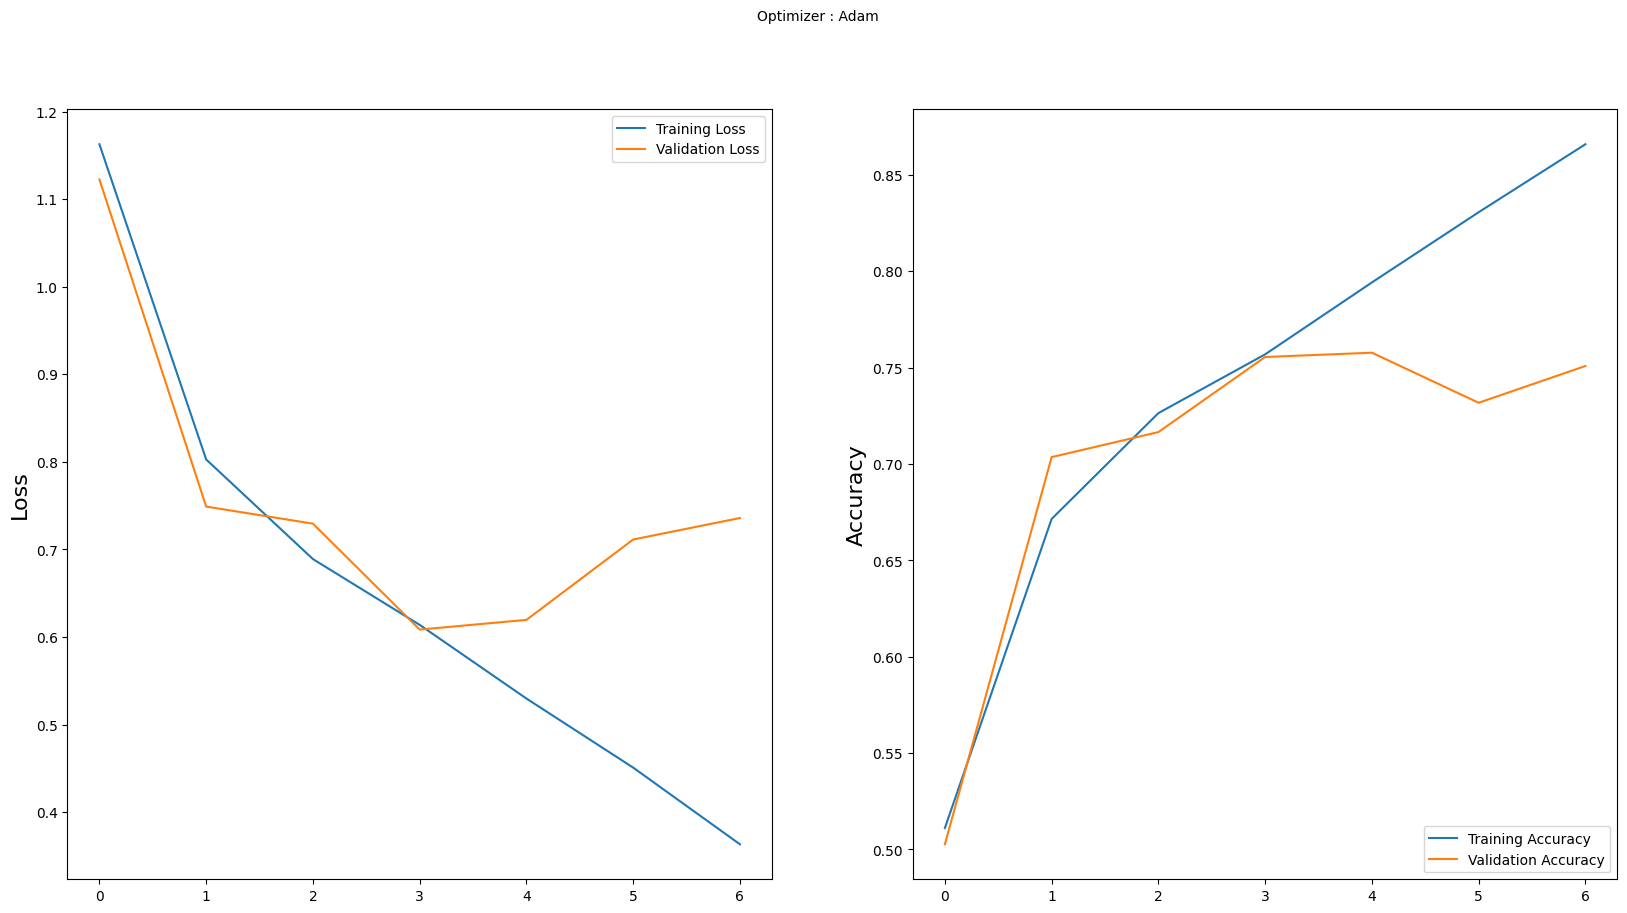

In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

### **Evaluating the VGG16 model**

In [ ]:
test_images, test_labels = next(test_ds)
STEP_SIZE_TEST=test_ds.n//test_ds.batch_size
test_ds.reset()

pred_vgg = vggmodel.predict(test_images,
                  steps=STEP_SIZE_TEST,
                  verbose=1)

predvgg_indices=np.argmax(pred_vgg,axis=1)
y_vgg = np.argmax(test_labels, axis = 1)



2/2 [==============================] - 1s 10ms/step


In [ ]:
cnn_test_loss, cnn_test_accuracy = vggmodel.evaluate(val_ds)
print(f'Test Loss: {cnn_test_loss:.2f}')
print(f'Test Accuracy: {cnn_test_accuracy:.2%}')

78/78 [==============================] - 16s 201ms/step - loss: 0.6093 - accuracy: 0.7549
Test Loss: 0.61
Test Accuracy: 75.49%


In [ ]:
print((history4.history['accuracy']))
print((history4.history['val_accuracy']))
print((history4.history['loss']))
print((history4.history['val_loss']))

[0.511071503162384, 0.6714565753936768, 0.7263683080673218, 0.7568550705909729, 0.7941522598266602, 0.8305937051773071, 0.8658584356307983]
[0.5026379823684692, 0.7035308480262756, 0.7165178656578064, 0.7554789185523987, 0.7577110528945923, 0.7317370176315308, 0.7508116960525513]
[1.1625888347625732, 0.8027340173721313, 0.6890222430229187, 0.6138973832130432, 0.5297942161560059, 0.45092451572418213, 0.36339128017425537]
[1.1224735975265503, 0.7489319443702698, 0.7294550538063049, 0.6085202097892761, 0.6195881962776184, 0.7113581299781799, 0.735884428024292]


In [ ]:
# Printing the classification report

print(classification_report(y_vgg, predvgg_indices))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.70      0.64      0.67        11
           2       0.84      0.89      0.86        18
           3       0.93      0.93      0.93        15

    accuracy                           0.89        64
   macro avg       0.87      0.86      0.87        64
weighted avg       0.89      0.89      0.89        64



<Figure size 640x480 with 0 Axes>

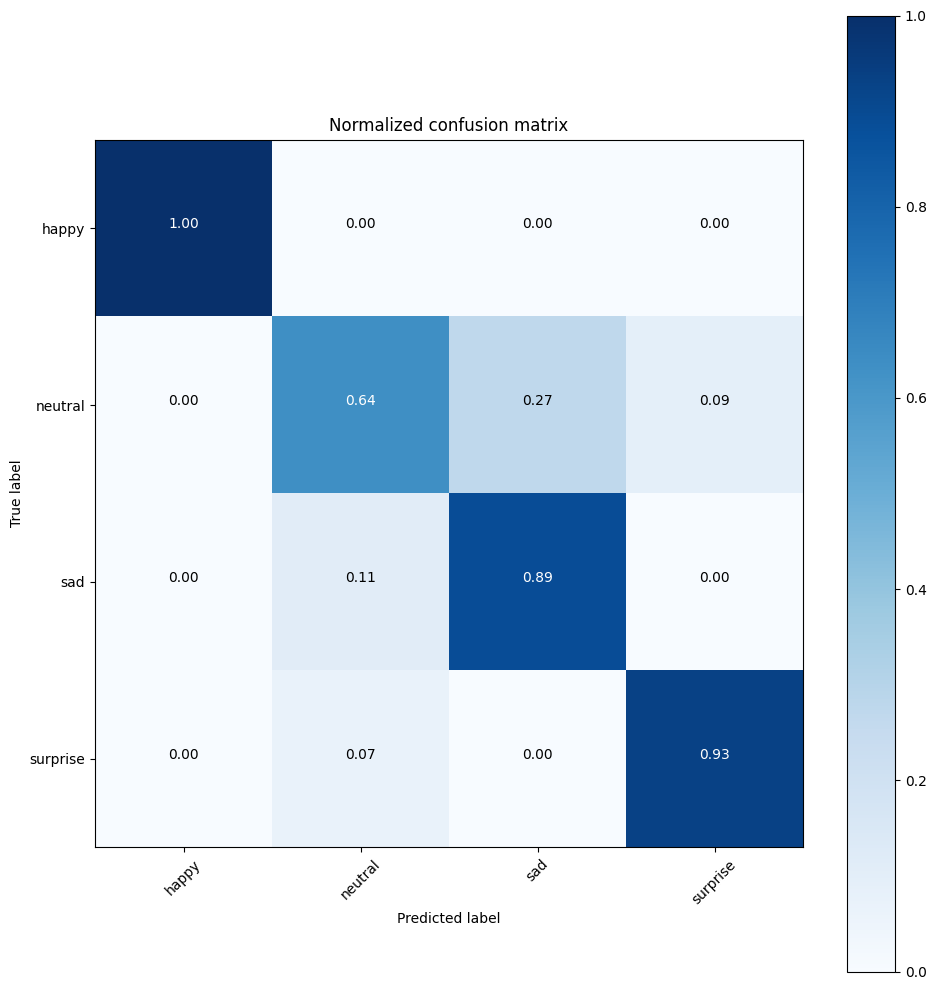

In [ ]:
# compute confusion matrix
cnf2_matrix = confusion_matrix(y_vgg, predvgg_indices)
np.set_printoptions(precision=2)



# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf2_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()




### Overall Performance
- **Accuracy**: The model achieves an accuracy of 89%, indicating that it correctly predicts the facial emotions in 89% of the cases.

### Summary
- The VGG16 model demonstrates outstanding performance overall, achieving high precision, recall, and F1-scores across all classes.
- Class 0 shows perfect precision and recall, indicating flawless performance for this class.
- Classes 1, 2, and 3 also exhibit strong performance with high precision and recall, suggesting reliable identification of these emotions.
- The overall accuracy of 89% is notably higher indicating that the VGG16 model is very effective for this facial emotion detection task.
- Further exploration could involve analyzing potential areas for improvement in classes where precision or recall is slightly lower, potentially through fine-tuning or data augmentation strategies.

This performance highlights the effectiveness of VGG16 architecture in handling the complexity of facial emotion recognition tasks.

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

ResNet-50, short for "Residual Network 50," is a deep Convolutional Neural Network architecture. It is renowned for its depth, utilizing skip connections to combat the vanishing gradient problem, making it exceptionally effective in various computer vision tasks, such as image classification, object detection, and feature extraction.

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

https://cv-tricks.com/keras/understand-implement-resnets/

In [ ]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

resnet_model = tf.keras.models.Sequential()

pretrained_model= tf.keras.applications.ResNet50V2(include_top=False,
                   input_shape=(48,48,3),
                   pooling='max',classes=no_of_classes,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=True

resnet_model.add(pretrained_model)
resnet_model.add(tf.keras.layers.Flatten())
resnet_model.add(tf.keras.layers.Dense(24, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.07)))
resnet_model.add(tf.keras.layers.Dropout(0.6))
resnet_model.add(tf.keras.layers.Dense(24, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.07)))
resnet_model.add(tf.keras.layers.Dense(4, activation='softmax'))
resnet_model.summary()

94668760/94668760 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 24)                49176     
                                                                 
 dropout_7 (Dropout)         (None, 24)                0         
                                                                 
 dense_7 (Dense)             (None, 24)                600       
                                                                 
 dense_8 (Dense)             (None, 4)                 100       
                                                       

### **Compiling and Training the Model**

In [ ]:
resnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)
epochs = 20

resnet_history = resnet_model.fit(
                  train_ds,
                  validation_data=val_ds,
                  epochs=epochs,
                  callbacks=[early_stopping]
)

Epoch 1/20
440/440 [==============================] - 99s 163ms/step - loss: 1.9842 - accuracy: 0.5219 - val_loss: 0.9826 - val_accuracy: 0.6466
Epoch 2/20
440/440 [==============================] - 69s 158ms/step - loss: 0.9670 - accuracy: 0.6316 - val_loss: 0.9278 - val_accuracy: 0.6574
Epoch 3/20
440/440 [==============================] - 70s 159ms/step - loss: 0.8617 - accuracy: 0.6749 - val_loss: 0.9523 - val_accuracy: 0.6349
Epoch 4/20
440/440 [==============================] - 69s 158ms/step - loss: 0.8138 - accuracy: 0.6955 - val_loss: 0.9571 - val_accuracy: 0.6353
Epoch 5/20
440/440 [==============================] - 69s 158ms/step - loss: 0.7623 - accuracy: 0.7238 - val_loss: 0.8011 - val_accuracy: 0.6833
Epoch 6/20
440/440 [==============================] - 70s 159ms/step - loss: 0.7236 - accuracy: 0.7401 - val_loss: 0.8608 - val_accuracy: 0.6809
Epoch 7/20
440/440 [==============================] - 69s 158ms/step - loss: 0.6933 - accuracy: 0.7529 - val_loss: 1.0271 - val_ac

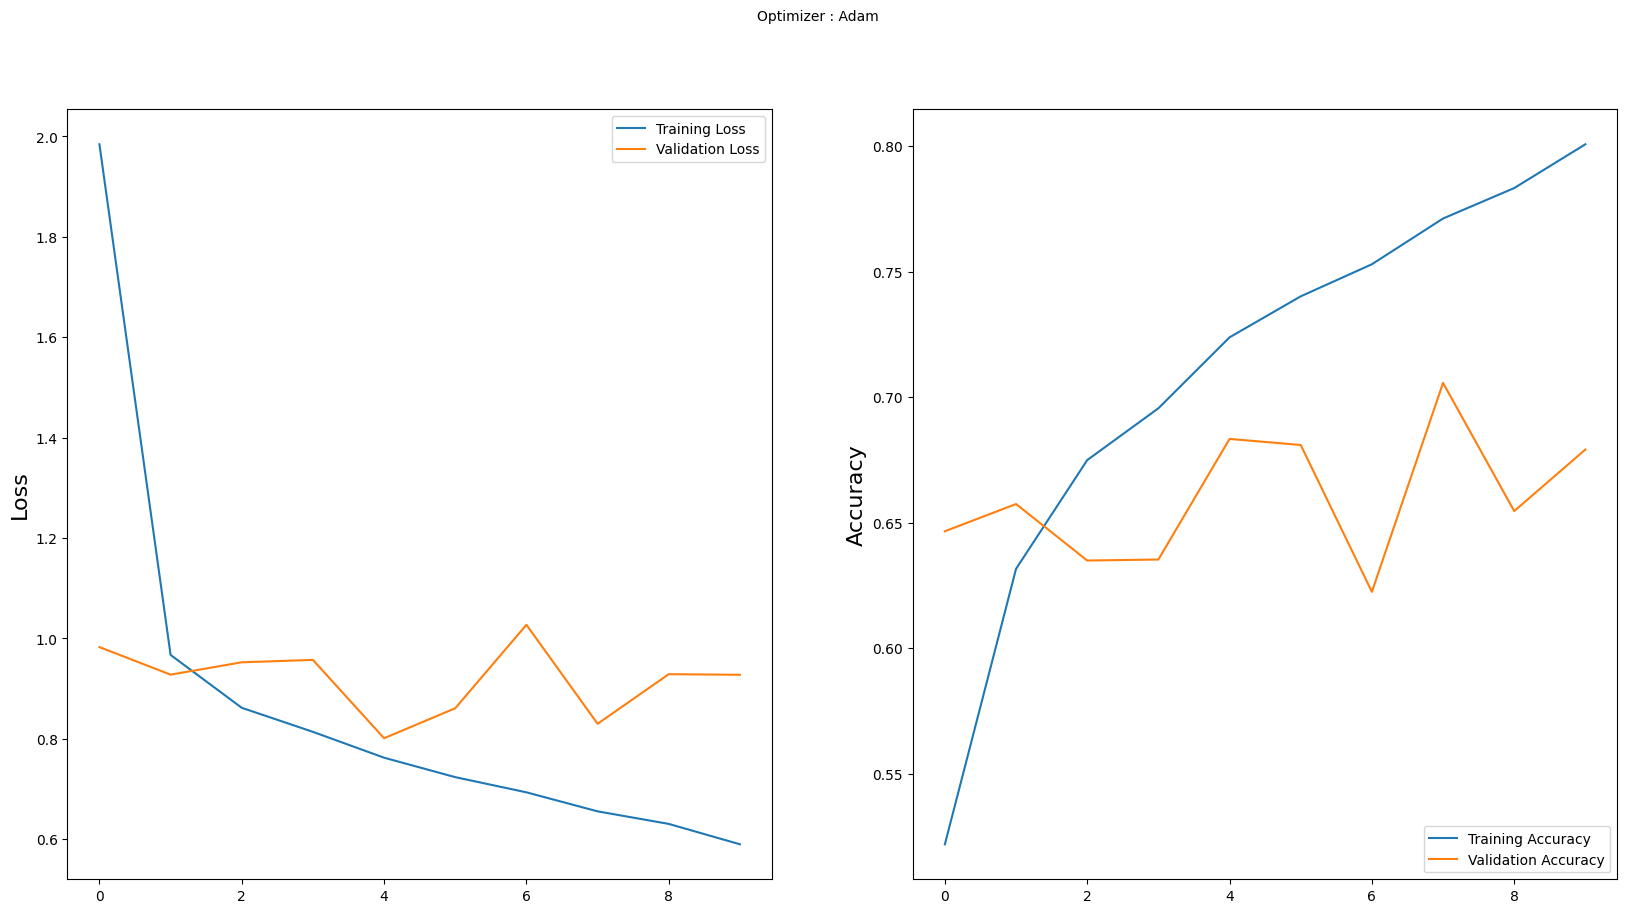

In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(resnet_history.history['loss'], label='Training Loss')
plt.plot(resnet_history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(resnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
resnet_test_loss, resnet_test_accuracy = resnet_model.evaluate(val_ds)
print(f"Test Loss: {resnet_test_loss}, Test Accuracy: {resnet_test_accuracy * 100:.2f}%")

78/78 [==============================] - 10s 131ms/step - loss: 0.8011 - accuracy: 0.6833
Test Loss: 0.8010507225990295, Test Accuracy: 68.33%


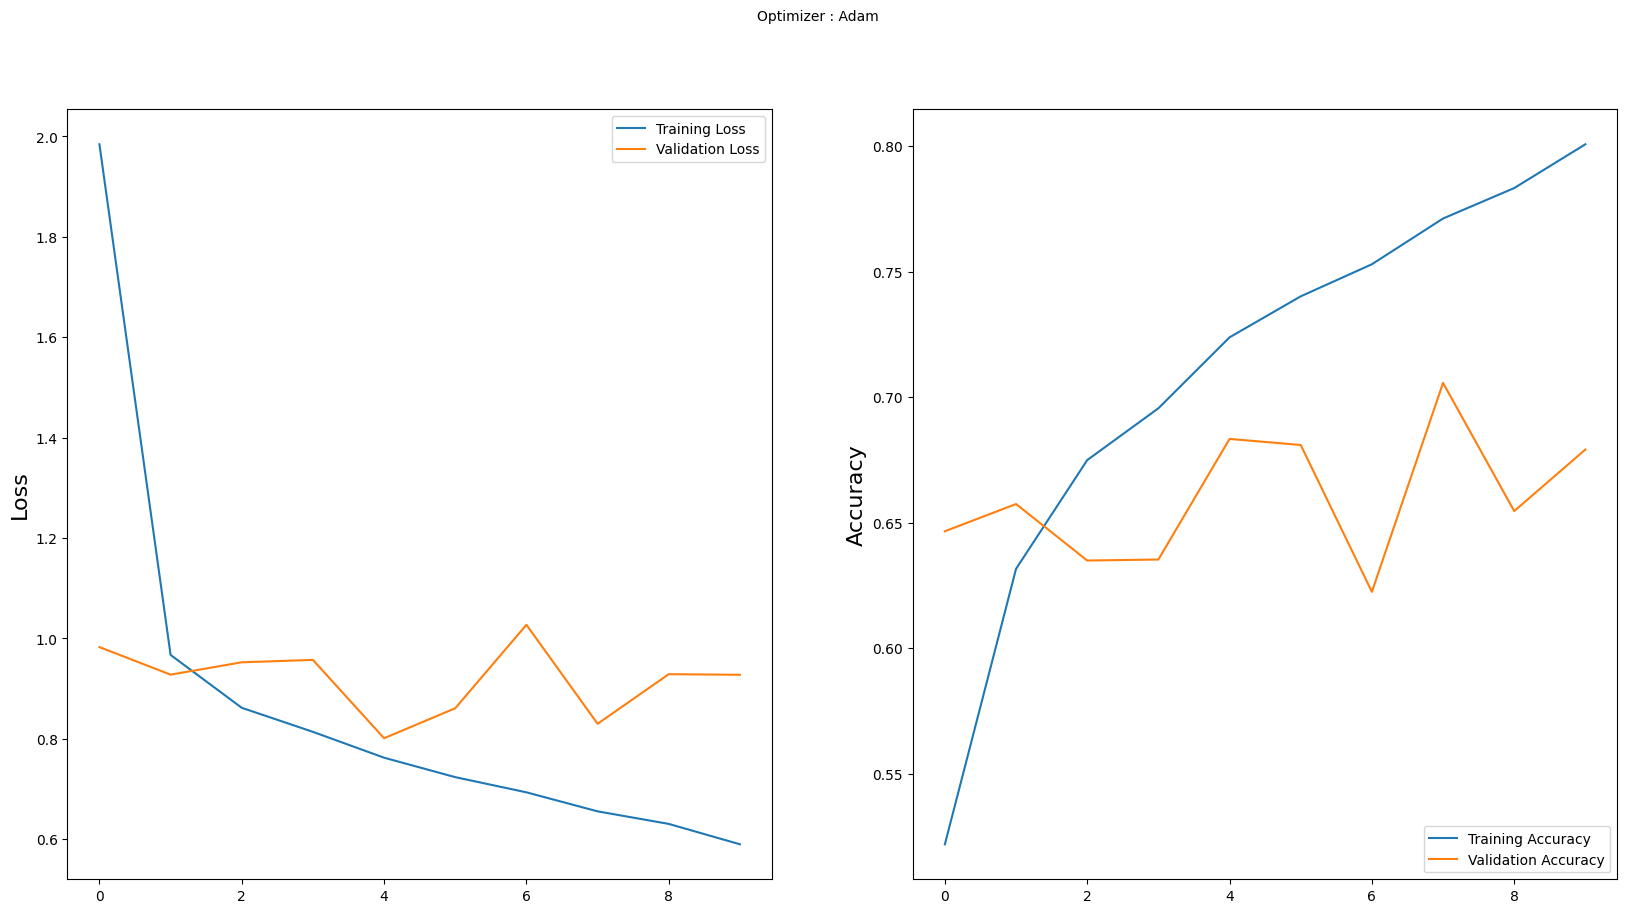

In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(resnet_history.history['loss'], label='Training Loss')
plt.plot(resnet_history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(resnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

### **Evaluating the ResNet Model**

In [ ]:
test_images, test_labels = next(test_ds)
STEP_SIZE_TEST=test_ds.n//test_ds.batch_size
test_ds.reset()

pred_resnet = resnet_model.predict(test_images,
                  steps=STEP_SIZE_TEST,
                  verbose=1)

predres_indices=np.argmax(pred_resnet,axis=1)
y_res = np.argmax(test_labels, axis = 1)



2/2 [==============================] - 1s 9ms/step


In [ ]:
cnn_test_loss, cnn_test_accuracy = resnet_model.evaluate(val_ds)
print(f'Test Loss: {cnn_test_loss:.2f}')
print(f'Test Accuracy: {cnn_test_accuracy:.2%}')

78/78 [==============================] - 10s 128ms/step - loss: 0.8011 - accuracy: 0.6833
Test Loss: 0.80
Test Accuracy: 68.33%


In [ ]:
# Printing the classification report

print(classification_report(y_res, predres_indices))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.43      0.77      0.56        13
           2       0.78      0.41      0.54        17
           3       0.90      0.95      0.92        19

    accuracy                           0.73        64
   macro avg       0.78      0.73      0.73        64
weighted avg       0.80      0.73      0.74        64



<Figure size 640x480 with 0 Axes>

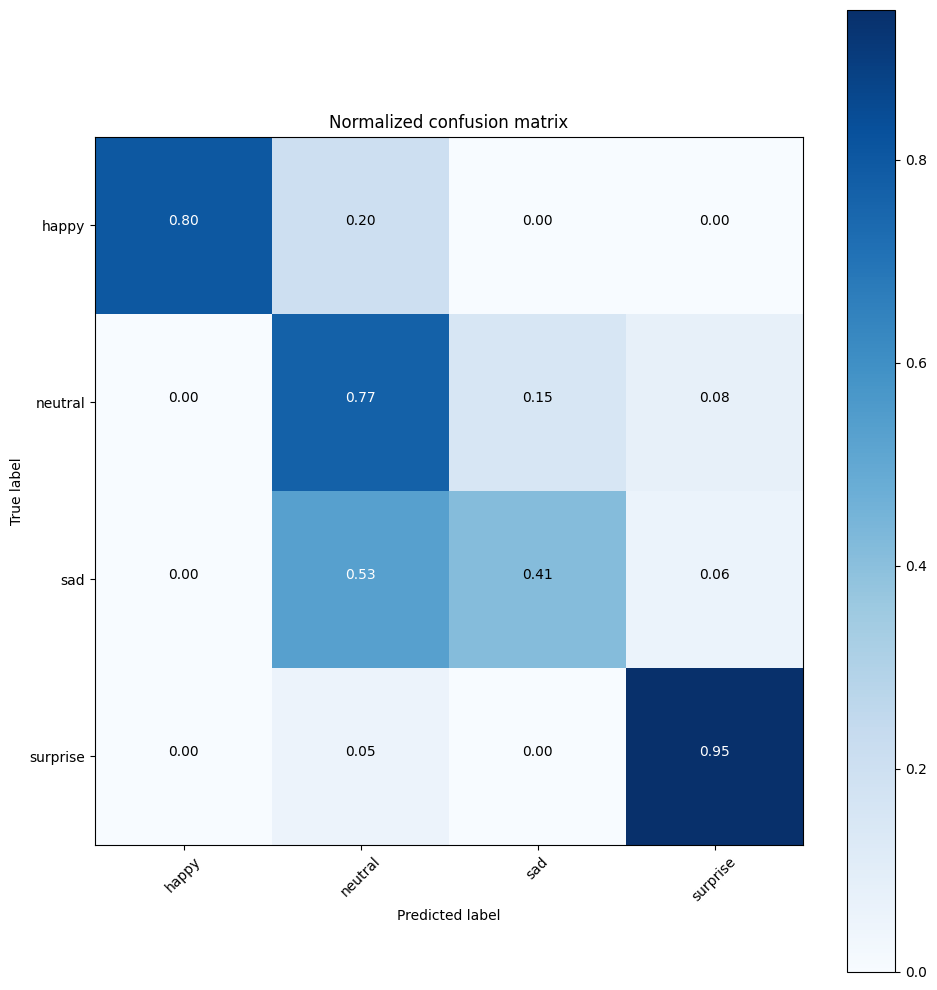

In [ ]:
# compute confusion matrix
cnf2_matrix = confusion_matrix(y_res, predres_indices)
np.set_printoptions(precision=2)



# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf2_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()


Based on the provided classification report for the ResNet50V2 model, here are some insights and observations:

### Overall Performance
- **Accuracy**: 73% accuracy indicates that the model correctly predicts the facial emotions in 73% of the cases. This is a significant improvement over the EfficientNet model's 59% accuracy and closer to the 77% accuracy of your initial CNN model.

### Summary
- The model performs exceptionally well on class 0 and class 3, with high precision, recall, and F1-scores, indicating strong identification and prediction capabilities for these classes.
- The model struggles with class 1 and class 2, particularly with precision for class 1 and recall for class 2, suggesting areas for improvement.
- Overall performance with an accuracy of 73% shows that the ResNet50V2 model is a strong contender and performs better than the EfficientNet model but slightly less effectively than the initial CNN model (77% accuracy).
- Potential improvements could include further fine-tuning, addressing class imbalance, or applying techniques like data augmentation to enhance model performance for the weaker classes.

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

EfficientNet is a family of neural network architectures that balance computational efficiency and model accuracy. It introduces a compound scaling method that uniformly scales network depth, width, and resolution. This allows EfficientNet models to perform exceptionally well while being highly resource-efficient, making them suitable for various applications on edge devices and cloud platforms. EfficientNet has achieved state-of-the-art results in image classification tasks and has been widely adopted in areas like computer vision and transfer learning. Its adaptability to different resource constraints and tasks has made it a go-to choice for developing efficient deep learning models.

In [ ]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

EfficientNet.summary()



35839040/35839040 [==============================] - 0s 0us/step
Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 48, 48, 3)            0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 48, 48, 3)            0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
x = EfficientNet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

efficientnet_model = Model(inputs=EfficientNet.input, outputs=predictions)
efficientnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
efficientnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 48, 48, 3)            0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 48, 48, 3)            0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, 24, 24, 32)           864       ['normalization[0][0]']   

### **Compiling and Training the Model**

In [ ]:
STEP_SIZE_TRAIN=train_ds.n//train_ds.batch_size
STEP_SIZE_VALID=val_ds.n//val_ds.batch_size

opt = Adam(learning_rate=0.0001)
efficientnet_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#train
eff_history = efficientnet_model.fit(train_ds, epochs=20,
                            steps_per_epoch=STEP_SIZE_TRAIN,
                            validation_data=val_ds,
                            validation_steps=STEP_SIZE_VALID,
                            callbacks=callbacks_list)

Epoch 1/20
439/439 [==============================] - ETA: 0s - loss: 1.2632 - accuracy: 0.4052
Epoch 1: val_accuracy did not improve from 0.73742
439/439 [==============================] - 126s 168ms/step - loss: 1.2632 - accuracy: 0.4052 - val_loss: 1.3294 - val_accuracy: 0.3894 - lr: 1.0000e-04
Epoch 2/20
439/439 [==============================] - ETA: 0s - loss: 1.0714 - accuracy: 0.5376
Epoch 2: val_accuracy did not improve from 0.73742
439/439 [==============================] - 71s 162ms/step - loss: 1.0714 - accuracy: 0.5376 - val_loss: 0.9392 - val_accuracy: 0.6009 - lr: 1.0000e-04
Epoch 3/20
439/439 [==============================] - ETA: 0s - loss: 0.9511 - accuracy: 0.6015
Epoch 3: val_accuracy did not improve from 0.73742
439/439 [==============================] - 71s 162ms/step - loss: 0.9511 - accuracy: 0.6015 - val_loss: 0.9576 - val_accuracy: 0.5954 - lr: 1.0000e-04
Epoch 4/20
439/439 [==============================] - ETA: 0s - loss: 0.8603 - accuracy: 0.6445
Epoch 4: 

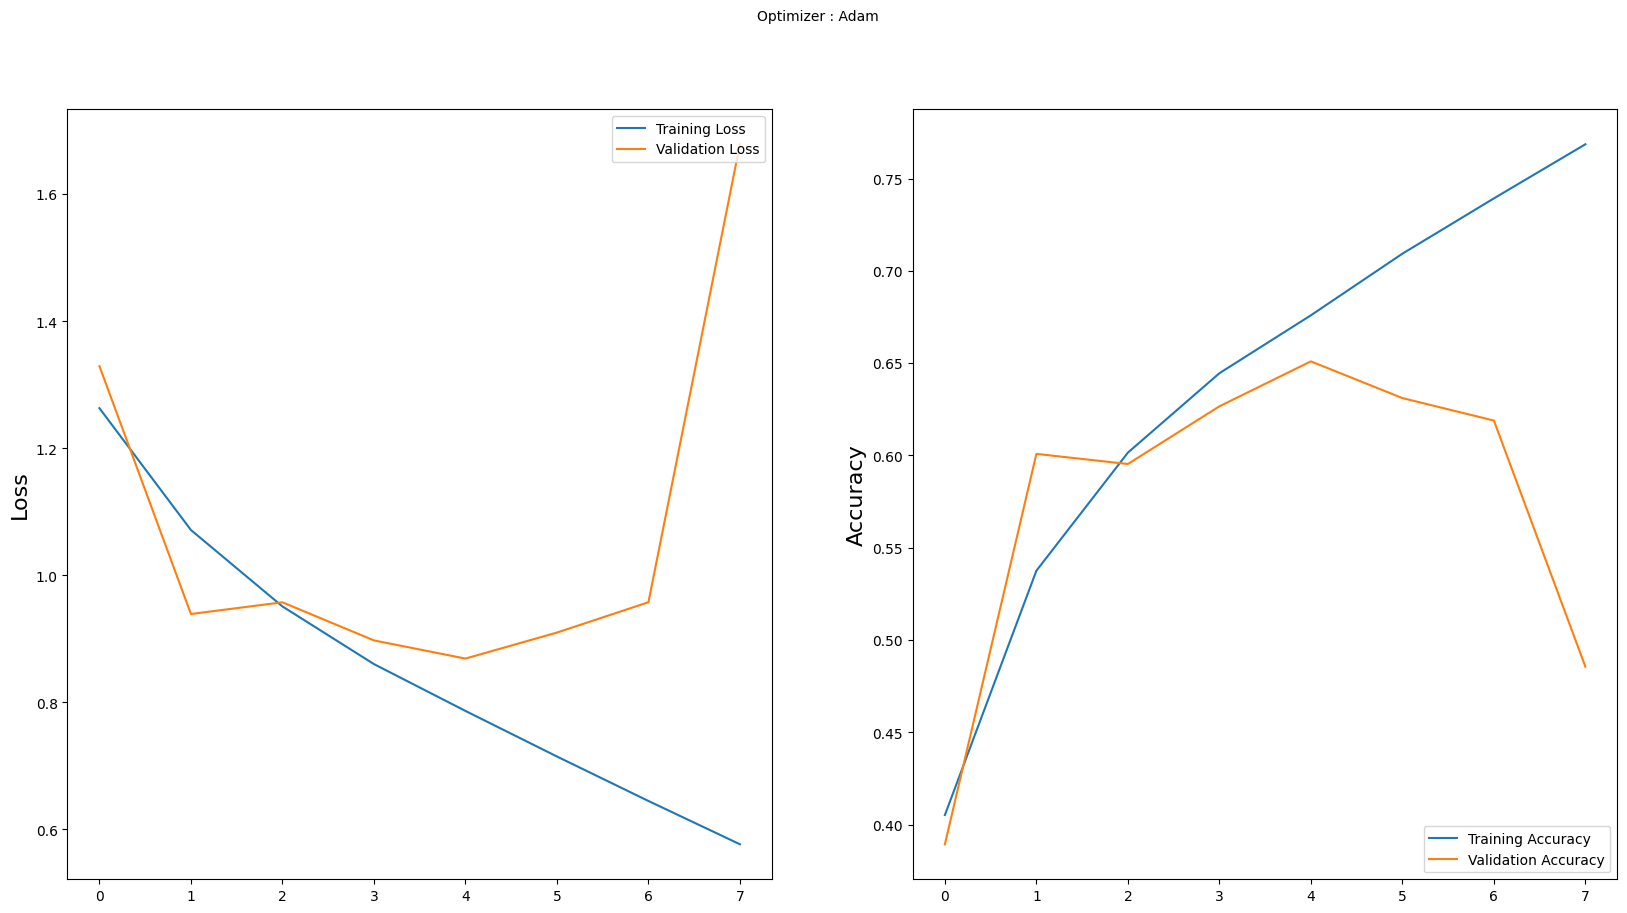

In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(eff_history.history['loss'], label='Training Loss')
plt.plot(eff_history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(eff_history.history['accuracy'], label='Training Accuracy')
plt.plot(eff_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

### **Evaluating the EfficientnetNet Model**

In [ ]:
test_images, test_labels = next(test_ds)
STEP_SIZE_TEST=test_ds.n//test_ds.batch_size
test_ds.reset()

pred_effnet = efficientnet_model.predict(test_images,
                  steps=STEP_SIZE_TEST,
                  verbose=1)

predeff_indices=np.argmax(pred_effnet,axis=1)
y_eff = np.argmax(test_labels, axis = 1)



2/2 [==============================] - 2s 14ms/step


In [ ]:
cnn_test_loss, cnn_test_accuracy = efficientnet_model.evaluate(val_ds)
print(f'Test Loss: {cnn_test_loss:.2f}')
print(f'Test Accuracy: {cnn_test_accuracy:.2%}')

78/78 [==============================] - 11s 135ms/step - loss: 0.8708 - accuracy: 0.6508
Test Loss: 0.87
Test Accuracy: 65.08%


In [ ]:
# Printing the classification report

print(classification_report(y_eff, predeff_indices))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73        16
           1       0.57      0.47      0.52        17
           2       0.43      0.45      0.44        20
           3       0.67      0.91      0.77        11

    accuracy                           0.59        64
   macro avg       0.61      0.63      0.61        64
weighted avg       0.60      0.59      0.59        64



<Figure size 640x480 with 0 Axes>

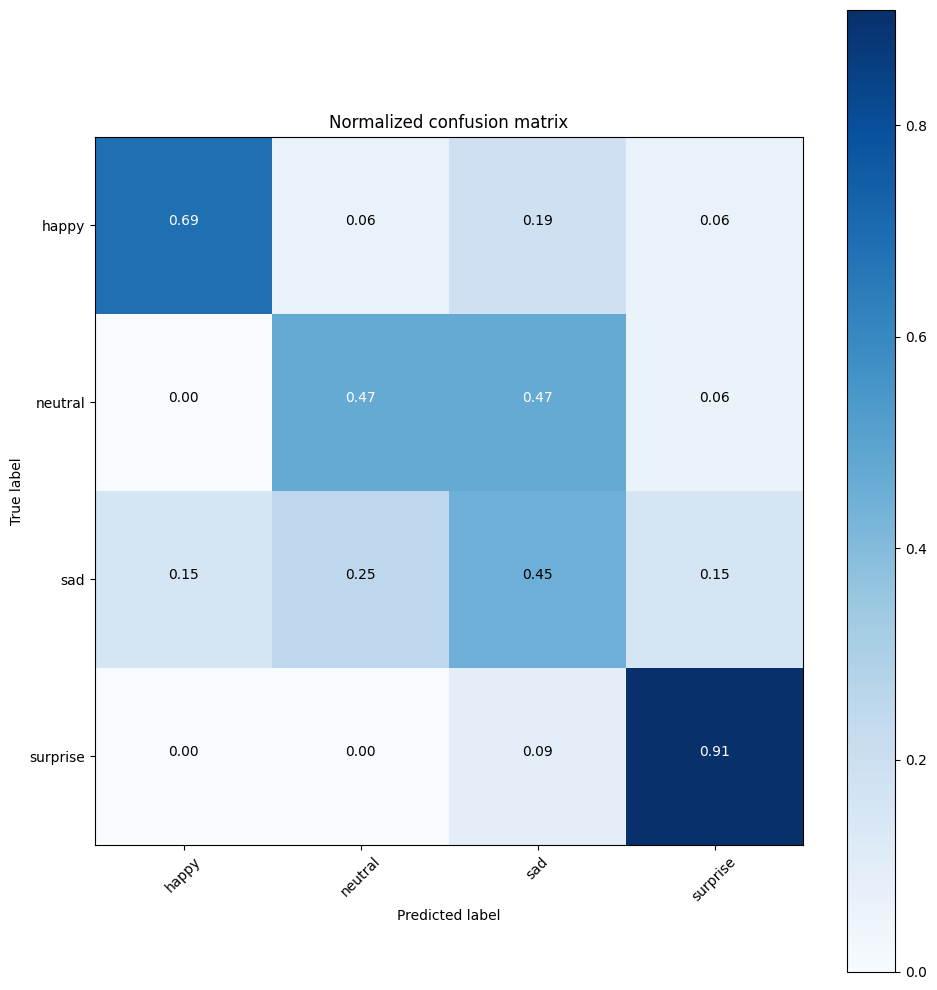

In [ ]:
# compute confusion matrix
cnf2_matrix = confusion_matrix(y_eff, predeff_indices)
np.set_printoptions(precision=2)



# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf2_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()




**Summary of EfficientNet Model Training for Facial Emotion Detection:**

### Overall Performance
- **Accuracy**: 59% accuracy indicates that the model correctly predicts the facial emotions in 59% of the cases.

### Summary
- The model performs best on class 0 and class 3, with higher precision and recall, indicating better identification and prediction for these classes.
- The model struggles significantly with class 1 and class 2, showing lower precision, recall, and F1-scores.
- Overall performance with an accuracy of 59% suggests that the EfficientNet transfer learning model is less effective  and its needs to be improved further using hyperparameter tuning , data augmentation etc,,


**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

#Final Submission - Notebook


#Summary

The intent of this project is to train the model to determine facial expressions based on provided data and test that model. The reason for sunch an effort is to provide a computer vision algorithm as a front end for emotion based applications. Such applications are applicable for social media , mental health, security and survillance, talent development and management and driver behaviour.

Our original goal was to develop a model that would give the accuracy upto 90%, however after several iterations with modal parameters, hyper parameters as well as with early stopping, and using data augmentation technique, the model yieled the result with the test accuracy of 80%.

During the process, i have tried with the 3 layer and 4 year convo model also with the grayscale variation.  Below table shows the overall performance of these experiented models .

Overall, the final model (cnn_model) used within this notebook, produced an accuracy score of 80% on the test data. This was created by 5 layer convolution network with normalization and drop out layers.

The final conclusion is that the model learns well and can generalize well with more data. My suggestion would be to continue to train the model on increasing data sets and depending on application - provide front end design for continuous learning.

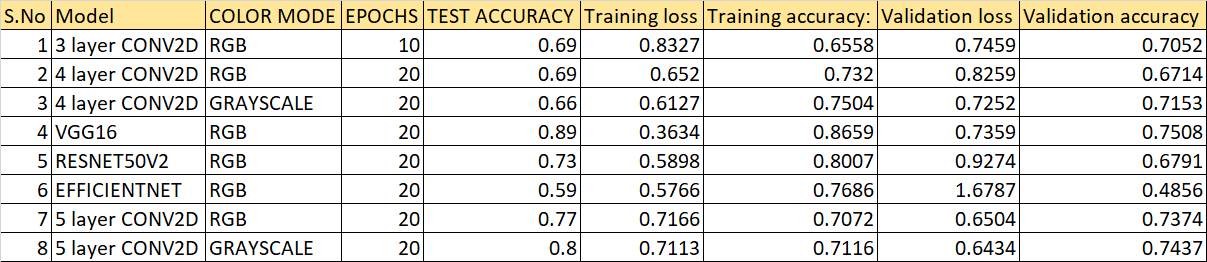

#Data

All the data loading from the provided data set has been implemented in the top section of this notebook as common modules.

We have performed the data augmentation techniques for the training data set and doubled the training images to the count of ~7000 and made all the emotions images equal.

** Data Augmentaion **

 The below parametes has been used on the data augmentation to improve the training set. Total images has been almost doubed and made all the emotion images almost equal and ~~7000

1.   Rotate
2.   Flip
3.   Random contrast
4.   Random brighness


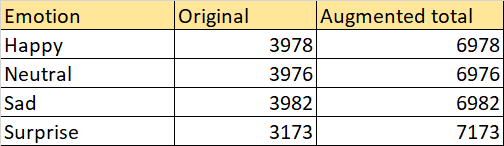

**Note**

The provided imagse are in grayscale. There were not much difference between the RGB and Grayscale and we could see in the comparsion table. Also note that from the images shown there is no much variance in skin tone. However key features are in the fixed areas on the image.

With respect to the size and representation of the data, it was clear that data augmentation is necessary. From looking at the data, we assume that the sadness and neutral would be difficult to differntiate. Also the difference in representation across the classes seems negligible.

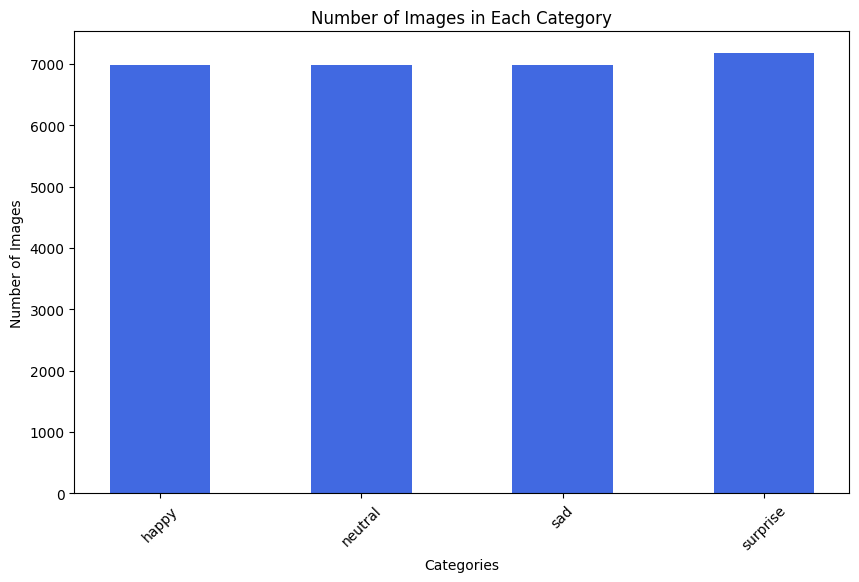

In [6]:
plot_no_of_images(train_dir)

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

Data loaders created during the transfer learning process can be used for tis final architecture

#Creating Dataframes

In [7]:
train_data = []
test_data = []
val_data = []

def get_data(directory):
    data = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            if filename.endswith('.jpg'):
                image_path = os.path.join(label_dir, filename)
                data.append({'label': label, 'path': image_path})
    return data

In [8]:
train_df = pd.DataFrame(get_data(train_dir))
test_df = pd.DataFrame(get_data(test_dir))
val_df = pd.DataFrame(get_data(val_dir))

In [9]:
print(train_df.shape)
print(test_df.shape)
print(val_df.shape)
print(test_df['label'].unique())
print(train_df['label'].unique())
print(val_df['label'].unique())

(28109, 2)
(128, 2)
(4977, 2)
['happy' 'neutral' 'sad' 'surprise']
['happy' 'neutral' 'sad' 'surprise']
['happy' 'neutral' 'sad' 'surprise']


In [10]:
img_width, img_height = 48, 48
batch_size = 64
y_col = 'label'
x_col = 'path'
no_of_classes = len(train_df[y_col].unique())

datagen_validation = ImageDataGenerator(rescale=1./255)
datagen_train = ImageDataGenerator(rescale=1./255)
datagen_test = ImageDataGenerator(rescale=1./255)

train_ds = datagen_train.flow_from_directory(
            train_dir,
            target_size=(img_height, img_width),
            color_mode = "grayscale",
            batch_size=batch_size,
            class_mode="categorical")

val_ds = datagen_validation.flow_from_directory(
          val_dir,
          target_size=(img_height, img_width),
          color_mode = "grayscale",
          batch_size=batch_size,
          class_mode="categorical")

test_ds = datagen_test.flow_from_directory(
          test_dir,
          target_size=(img_height, img_width),
          color_mode = "grayscale",
          batch_size=batch_size,
          class_mode="categorical")

Found 28109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

**cnn_model_1 us created with the gray scale images**

In [11]:
cnn_model_1 = Sequential()

cnn_model_1.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
cnn_model_1.add(BatchNormalization())
cnn_model_1.add(Activation('relu'))
cnn_model_1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_1.add(Dropout(0.25))

cnn_model_1.add(Conv2D(128, (3, 3), padding='same'))
cnn_model_1.add(BatchNormalization())
cnn_model_1.add(Activation('relu'))
cnn_model_1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_1.add(Dropout(0.25))

cnn_model_1.add(Conv2D(256, (3, 3), padding='same'))
cnn_model_1.add(BatchNormalization())
cnn_model_1.add(Activation('relu'))
cnn_model_1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_1.add(Dropout(0.25))

cnn_model_1.add(Conv2D(512, (3, 3), padding='same'))
cnn_model_1.add(BatchNormalization())
cnn_model_1.add(Activation('relu'))
cnn_model_1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_1.add(Dropout(0.25))

cnn_model_1.add(Conv2D(512, (3, 3), padding='same'))
cnn_model_1.add(BatchNormalization())
cnn_model_1.add(Activation('relu'))
cnn_model_1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model_1.add(Dropout(0.25))

cnn_model_1.add(Flatten())
cnn_model_1.add(Dense(512))
cnn_model_1.add(BatchNormalization())
cnn_model_1.add(Activation('relu'))
cnn_model_1.add(Dropout(0.5))

cnn_model_1.add(Dense(512))
cnn_model_1.add(BatchNormalization())
cnn_model_1.add(Activation('relu'))
cnn_model_1.add(Dropout(0.5))

cnn_model_1.add(Dense(4, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
cnn_model_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       7

In [15]:
STEP_SIZE_TRAIN=train_ds.n//train_ds.batch_size
STEP_SIZE_VALID=val_ds.n//val_ds.batch_size


opt = Adam(learning_rate=0.0001)
cnn_model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#train
history8 = cnn_model_1.fit(train_ds, epochs=20,
                            steps_per_epoch=STEP_SIZE_TRAIN,
                            validation_data=val_ds,
                            validation_steps=STEP_SIZE_VALID,
                            callbacks=callbacks_list)

Epoch 1/20
439/439 [==============================] - ETA: 0s - loss: 1.7133 - accuracy: 0.2879 
Epoch 1: val_accuracy improved from -inf to 0.37256, saving model to ./model2.keras
439/439 [==============================] - 24011s 55s/step - loss: 1.7133 - accuracy: 0.2879 - val_loss: 1.3708 - val_accuracy: 0.3726 - lr: 1.0000e-04
Epoch 2/20
439/439 [==============================] - ETA: 0s - loss: 1.5683 - accuracy: 0.3237
Epoch 2: val_accuracy improved from 0.37256 to 0.44724, saving model to ./model2.keras
439/439 [==============================] - 68s 156ms/step - loss: 1.5683 - accuracy: 0.3237 - val_loss: 1.2605 - val_accuracy: 0.4472 - lr: 1.0000e-04
Epoch 3/20
439/439 [==============================] - ETA: 0s - loss: 1.4363 - accuracy: 0.3658
Epoch 3: val_accuracy improved from 0.44724 to 0.47646, saving model to ./model2.keras
439/439 [==============================] - 68s 154ms/step - loss: 1.4363 - accuracy: 0.3658 - val_loss: 1.1738 - val_accuracy: 0.4765 - lr: 1.0000e-04

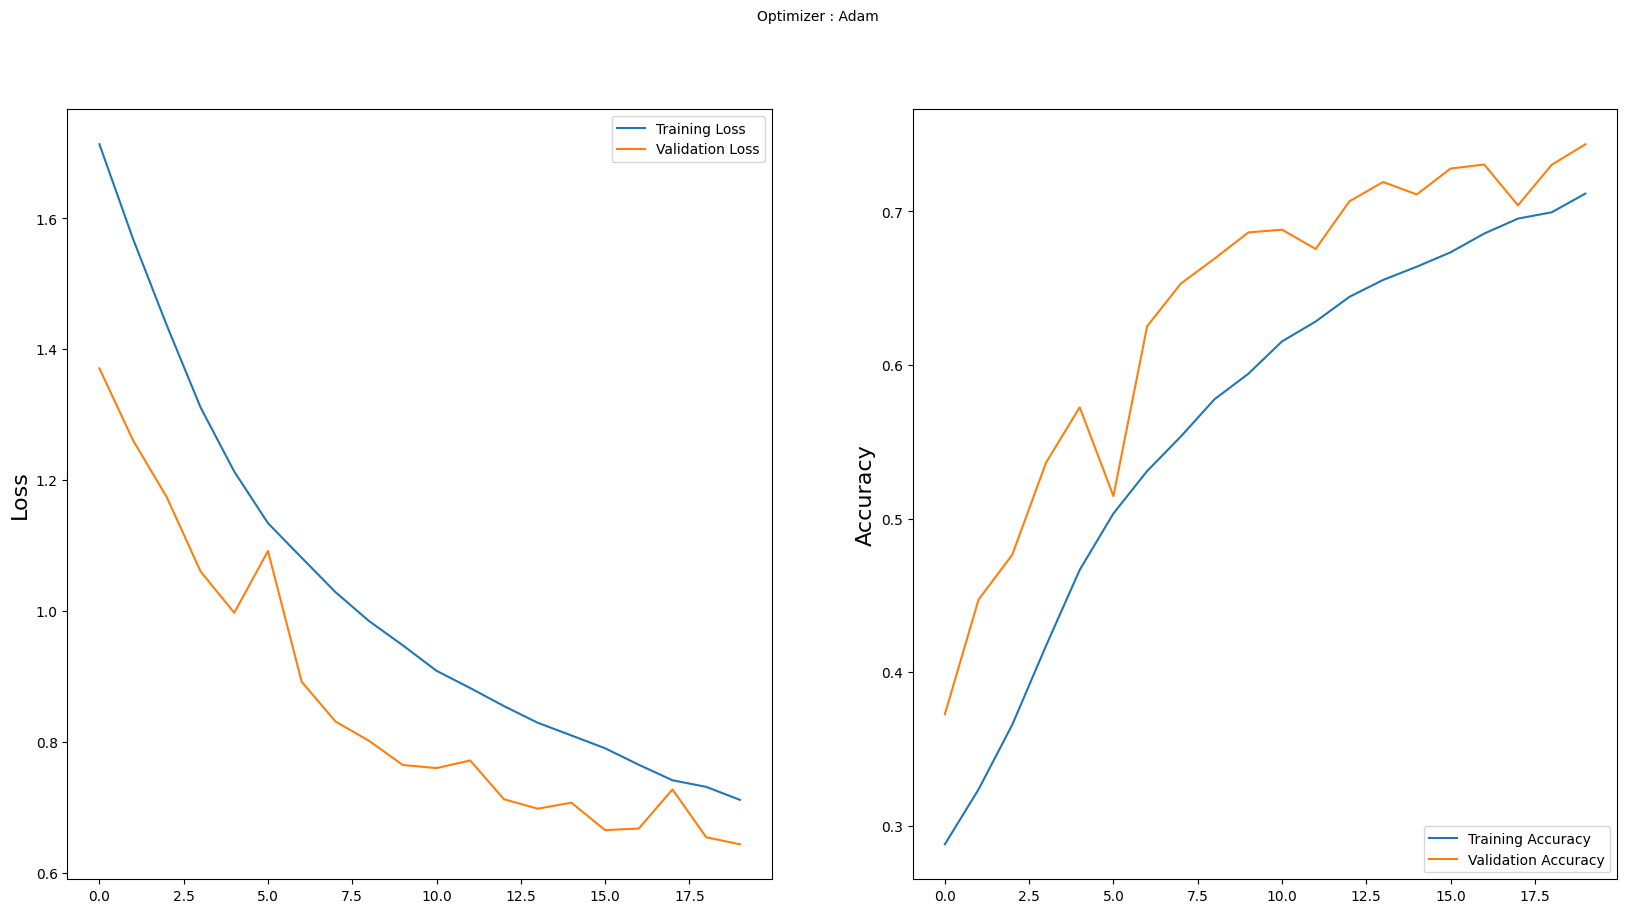

In [16]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history8.history['loss'], label='Training Loss')
plt.plot(history8.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history8.history['accuracy'], label='Training Accuracy')
plt.plot(history8.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

### **Evaluating the Model on Test Set**

In [17]:
test_images, test_labels = next(test_ds)
STEP_SIZE_TEST=test_ds.n//test_ds.batch_size
test_ds.reset()

pred_com1 = cnn_model_1.predict(test_images,
                  steps=STEP_SIZE_TEST,
                  verbose=1)

predcom1_indices=np.argmax(pred_com1,axis=1)
y_com = np.argmax(test_labels, axis = 1)



2/2 [==============================] - 0s 5ms/step


In [18]:
# provides the accuracy on the validation data set
cnn_test_loss, cnn_test_accuracy = cnn_model_1.evaluate(val_ds)
print(f'Test Loss: {cnn_test_loss:.2f}')
print(f'Test Accuracy: {cnn_test_accuracy:.2%}')

78/78 [==============================] - 11s 135ms/step - loss: 0.6439 - accuracy: 0.7432
Test Loss: 0.64
Test Accuracy: 74.32%


### **Plotting the Confusion Matrix  and classification report for the chosen final model**

<Figure size 640x480 with 0 Axes>

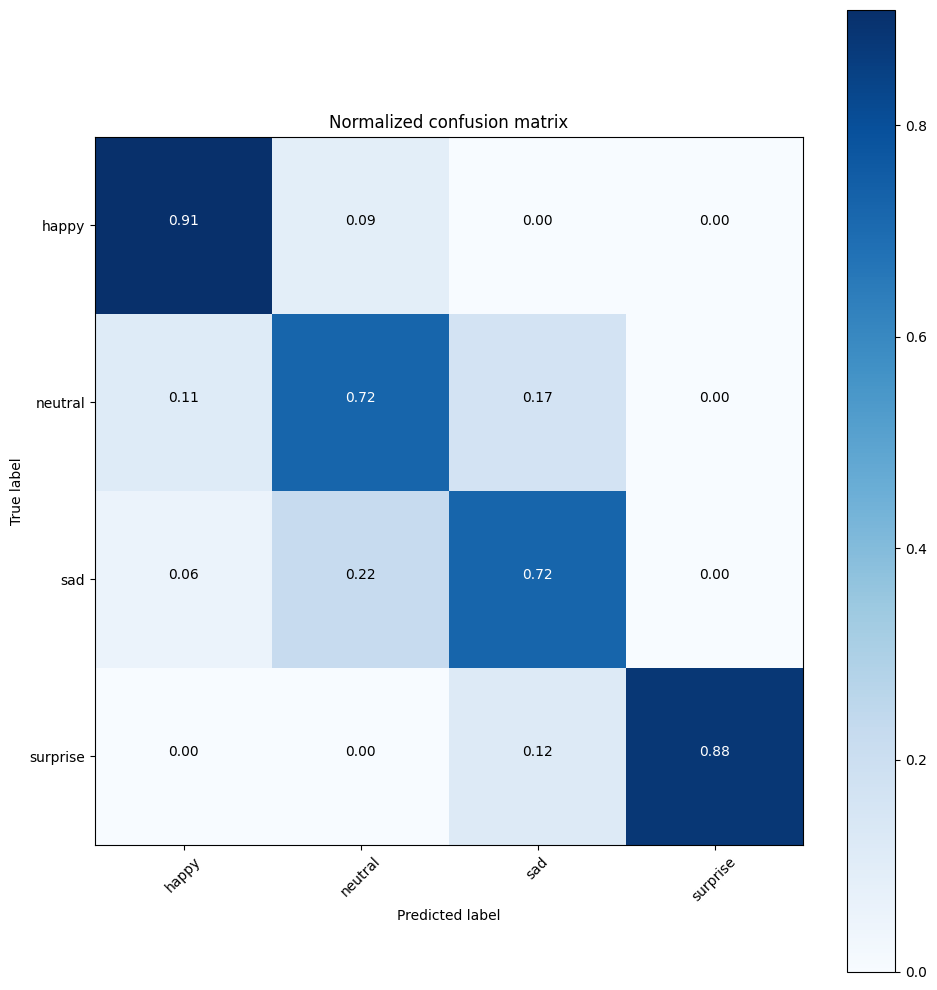

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.72      0.72      0.72        18
           2       0.72      0.72      0.72        18
           3       1.00      0.88      0.94        17

    accuracy                           0.80        64
   macro avg       0.80      0.81      0.80        64
weighted avg       0.80      0.80      0.80        64



In [23]:
# compute confusion matrix
cnf2_matrix = confusion_matrix(y_com, predcom1_indices)
np.set_printoptions(precision=2)



# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf2_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()


# Printing the classification report

print(classification_report(y_com, predcom1_indices))

**Summary**

1. The model demonstrates strong overall performance with an accuracy of 80%.
2. Surprise (Class 3) has the highest precision (1.00) and a high F1-score (0.94), indicating excellent model performance for this emotion with perfect precision and high recall.
3. Happy (Class 0) also performs well, with high recall (0.91) and a good F1-score (0.83), though precision is slightly lower (0.77).
4. Neutral (Class 1) and Sad (Class 2) show balanced but moderate performance with equal precision, recall, and F1-scores of 0.72, indicating that the model's performance is consistent but not as strong as for "Happy" and "Surprise."
5. The macro and weighted averages of precision, recall, and F1-score are all around 0.80, reflecting the balanced performance across all classes and the overall reliability of the model.

These insights highlight that while the model performs well overall, especially for "Happy" and "Surprise," there may still be room for improvement in achieving higher precision and recall for "Neutral" and "Sad."

**cnn_model is with RGB images**

In [ ]:
cnn_model = Sequential()

#1ST BLOCK
cnn_model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 3)))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

#2ND BLOCK
cnn_model.add(Conv2D(128, (3, 3), padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

#3RD BLOCK
cnn_model.add(Conv2D(256, (3, 3), padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

#4TH BLOCK
cnn_model.add(Conv2D(512, (3, 3), padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

#5TH BLOCK
cnn_model.add(Conv2D(512, (3, 3), padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

#FLATTEN
cnn_model.add(Flatten())

# DENSE 1
cnn_model.add(Dense(512))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.5))

# DENSE 2
cnn_model.add(Dense(512))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.5))

# FINAL
cnn_model.add(Dense(4, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       7

### **Compiling and Training the Model**

In [ ]:
STEP_SIZE_TRAIN=train_ds.n//train_ds.batch_size
STEP_SIZE_VALID=val_ds.n//val_ds.batch_size


opt = Adam(learning_rate=0.0001)
cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#train
history7 = cnn_model.fit(train_ds, epochs=20,
                            steps_per_epoch=STEP_SIZE_TRAIN,
                            validation_data=val_ds,
                            validation_steps=STEP_SIZE_VALID,
                            callbacks=callbacks_list)

Epoch 1/20
439/439 [==============================] - ETA: 0s - loss: 1.7451 - accuracy: 0.2876 
Epoch 1: val_accuracy improved from -inf to 0.36709, saving model to ./model2.keras
439/439 [==============================] - 12319s 28s/step - loss: 1.7451 - accuracy: 0.2876 - val_loss: 1.3404 - val_accuracy: 0.3671 - lr: 1.0000e-04
Epoch 2/20
439/439 [==============================] - ETA: 0s - loss: 1.5963 - accuracy: 0.3075
Epoch 2: val_accuracy improved from 0.36709 to 0.38738, saving model to ./model2.keras
439/439 [==============================] - 69s 157ms/step - loss: 1.5963 - accuracy: 0.3075 - val_loss: 1.2976 - val_accuracy: 0.3874 - lr: 1.0000e-04
Epoch 3/20
439/439 [==============================] - ETA: 0s - loss: 1.4540 - accuracy: 0.3559
Epoch 3: val_accuracy improved from 0.38738 to 0.48985, saving model to ./model2.keras
439/439 [==============================] - 68s 155ms/step - loss: 1.4540 - accuracy: 0.3559 - val_loss: 1.1872 - val_accuracy: 0.4899 - lr: 1.0000e-04

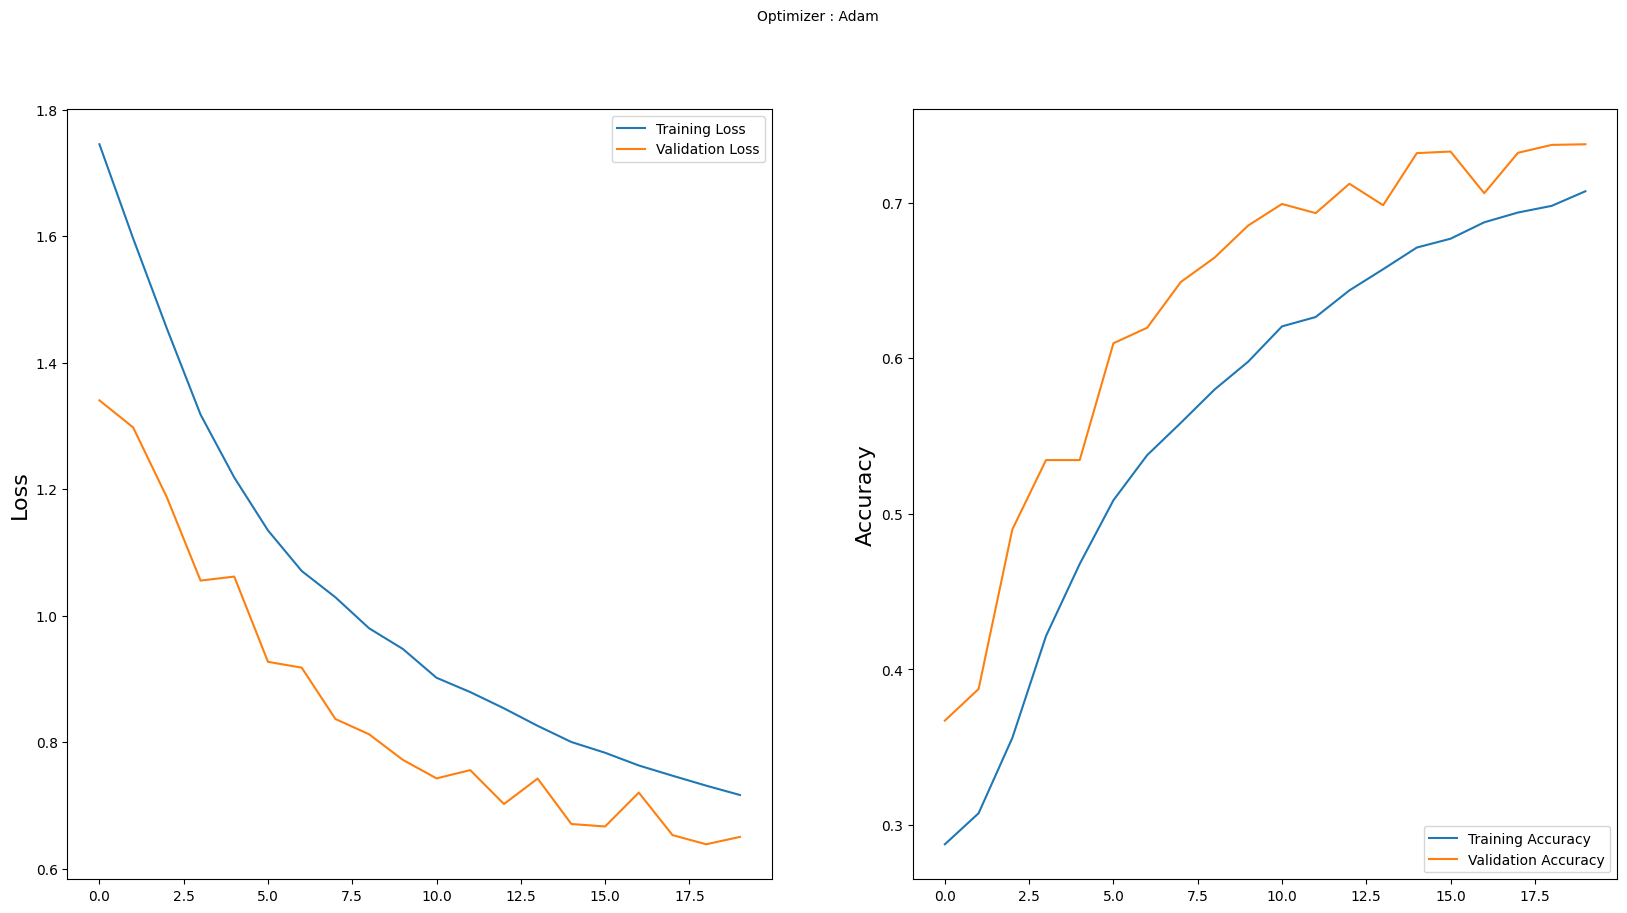

In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history7.history['loss'], label='Training Loss')
plt.plot(history7.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history7.history['accuracy'], label='Training Accuracy')
plt.plot(history7.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

### **Evaluating the Model on Test Set**

In [ ]:
test_images, test_labels = next(test_ds)
STEP_SIZE_TEST=test_ds.n//test_ds.batch_size
test_ds.reset()

pred_com = cnn_model.predict(test_images,
                  steps=STEP_SIZE_TEST,
                  verbose=1)

predcom_indices=np.argmax(pred_com,axis=1)
y_com = np.argmax(test_labels, axis = 1)



2/2 [==============================] - 0s 5ms/step


In [ ]:
# provides the accuracy on the validation data set
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(val_ds)
print(f'Test Loss: {cnn_test_loss:.2f}')
print(f'Test Accuracy: {cnn_test_accuracy:.2%}')

78/78 [==============================] - 11s 134ms/step - loss: 0.6487 - accuracy: 0.7384
Test Loss: 0.65
Test Accuracy: 73.84%


### **Plotting the Confusion Matrix  and classification report for the chosen final model**

<Figure size 640x480 with 0 Axes>

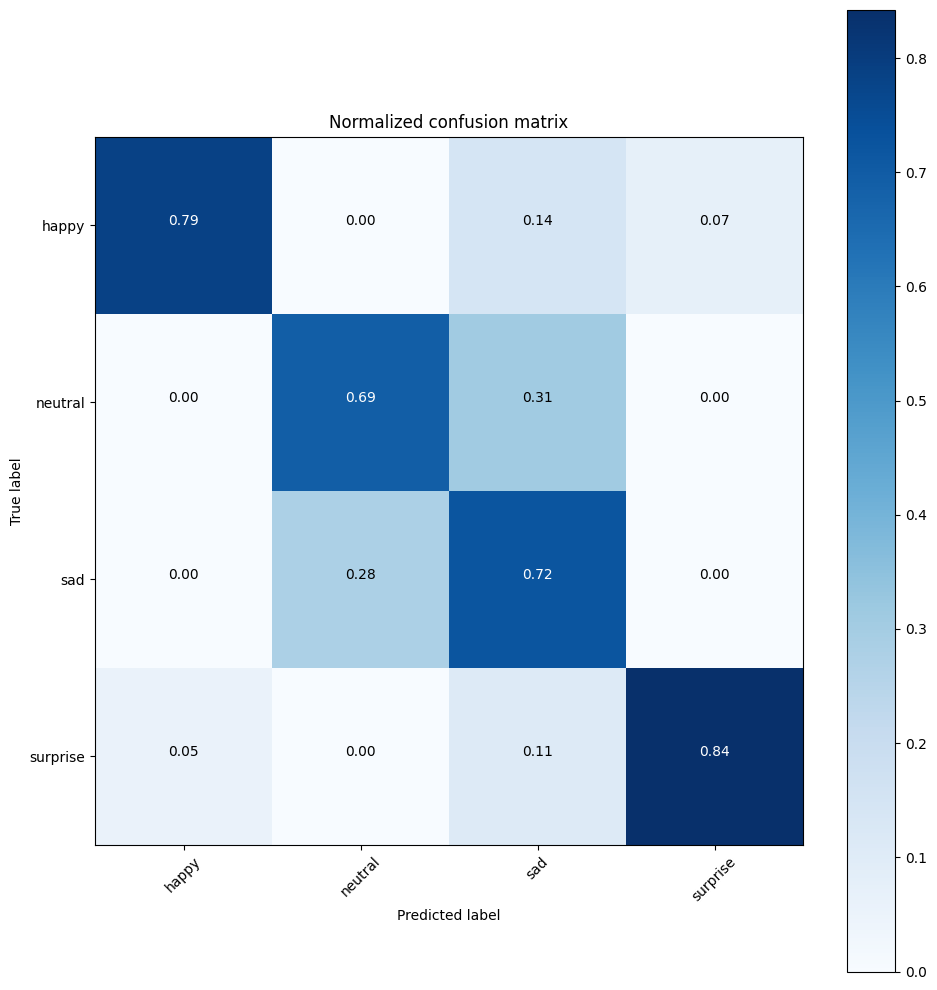

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.64      0.69      0.67        13
           2       0.62      0.72      0.67        18
           3       0.94      0.84      0.89        19

    accuracy                           0.77        64
   macro avg       0.78      0.76      0.77        64
weighted avg       0.78      0.77      0.77        64



In [ ]:
# compute confusion matrix
cnf2_matrix = confusion_matrix(y_com, predcom_indices)
np.set_printoptions(precision=2)



# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf2_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()


# Printing the classification report

print(classification_report(y_com, predcom_indices))

#Observations on the training and validation sets

### Summary of Epoch Training Details

1. **Accuracy Improvement**:
   - **Training Accuracy**: Started at 28.76% in epoch 1 and increased steadily to 70.72% by epoch 20.
   - **Validation Accuracy**: Started at 36.71% in epoch 1 and improved to 73.74% by epoch 20, indicating good generalization of the model to unseen data.

2. **Loss Reduction**:
   - **Training Loss**: Decreased from 1.7451 in epoch 1 to 0.7166 by epoch 20, showing a consistent reduction and better fitting of the model to the training data.
   - **Validation Loss**: Dropped from 1.3404 in epoch 1 to 0.6504 by epoch 20, paralleling the training loss trend, which is a positive sign of learning.

3. **Model Performance Peaks and Plateaus**:
   - Significant improvements in accuracy were observed in the initial epochs. For example, validation accuracy jumped from 48.99% in epoch 3 to 53.45% in epoch 4 and from 60.96% in epoch 6 to 61.95% in epoch 7.
   - Some epochs saw no improvement in validation accuracy, indicating potential plateaus (e.g., epochs 5, 12, 14, 17, and 18).

4. **Consistent Learning Rate**:
   - The learning rate was consistently maintained at \(1 \times 10^{-4}\) throughout all epochs, which provided a stable and gradual learning process without drastic fluctuations.

5. **Model Checkpointing**:
   - The model was saved whenever there was an improvement in validation accuracy. This practice ensured that the best-performing model was retained. The final model checkpoint was saved with a validation accuracy of 73.74% at epoch 20, highlighting the peak performance achieved during training.

### Conclusion
The training process demonstrated a strong and steady improvement in both training and validation metrics, indicating effective learning and good generalization capabilities of the CNN model for facial emotion detection. Further fine-tuning and possibly employing advanced techniques such as data augmentation, regularization, or hyperparameter optimization might push the performance even higher.

#Observations on the final CNN model on its accuracy.

1. The model performs best on class 0(Happy) and class 3(Surprise), with high precision, recall, and F1-scores.
2. The model struggles with class 1(Sad) and class 2(Neutral), indicating a need for improvement in distinguishing these emotions.
3. Overall, the model shows reasonable performance with an accuracy of 80%, but there is room for improvement, particularly for classes with lower precision and recall.

# Gives the picturized representation of the true and predicted value on the test data set

1/1 [==============================] - 0s 22ms/step


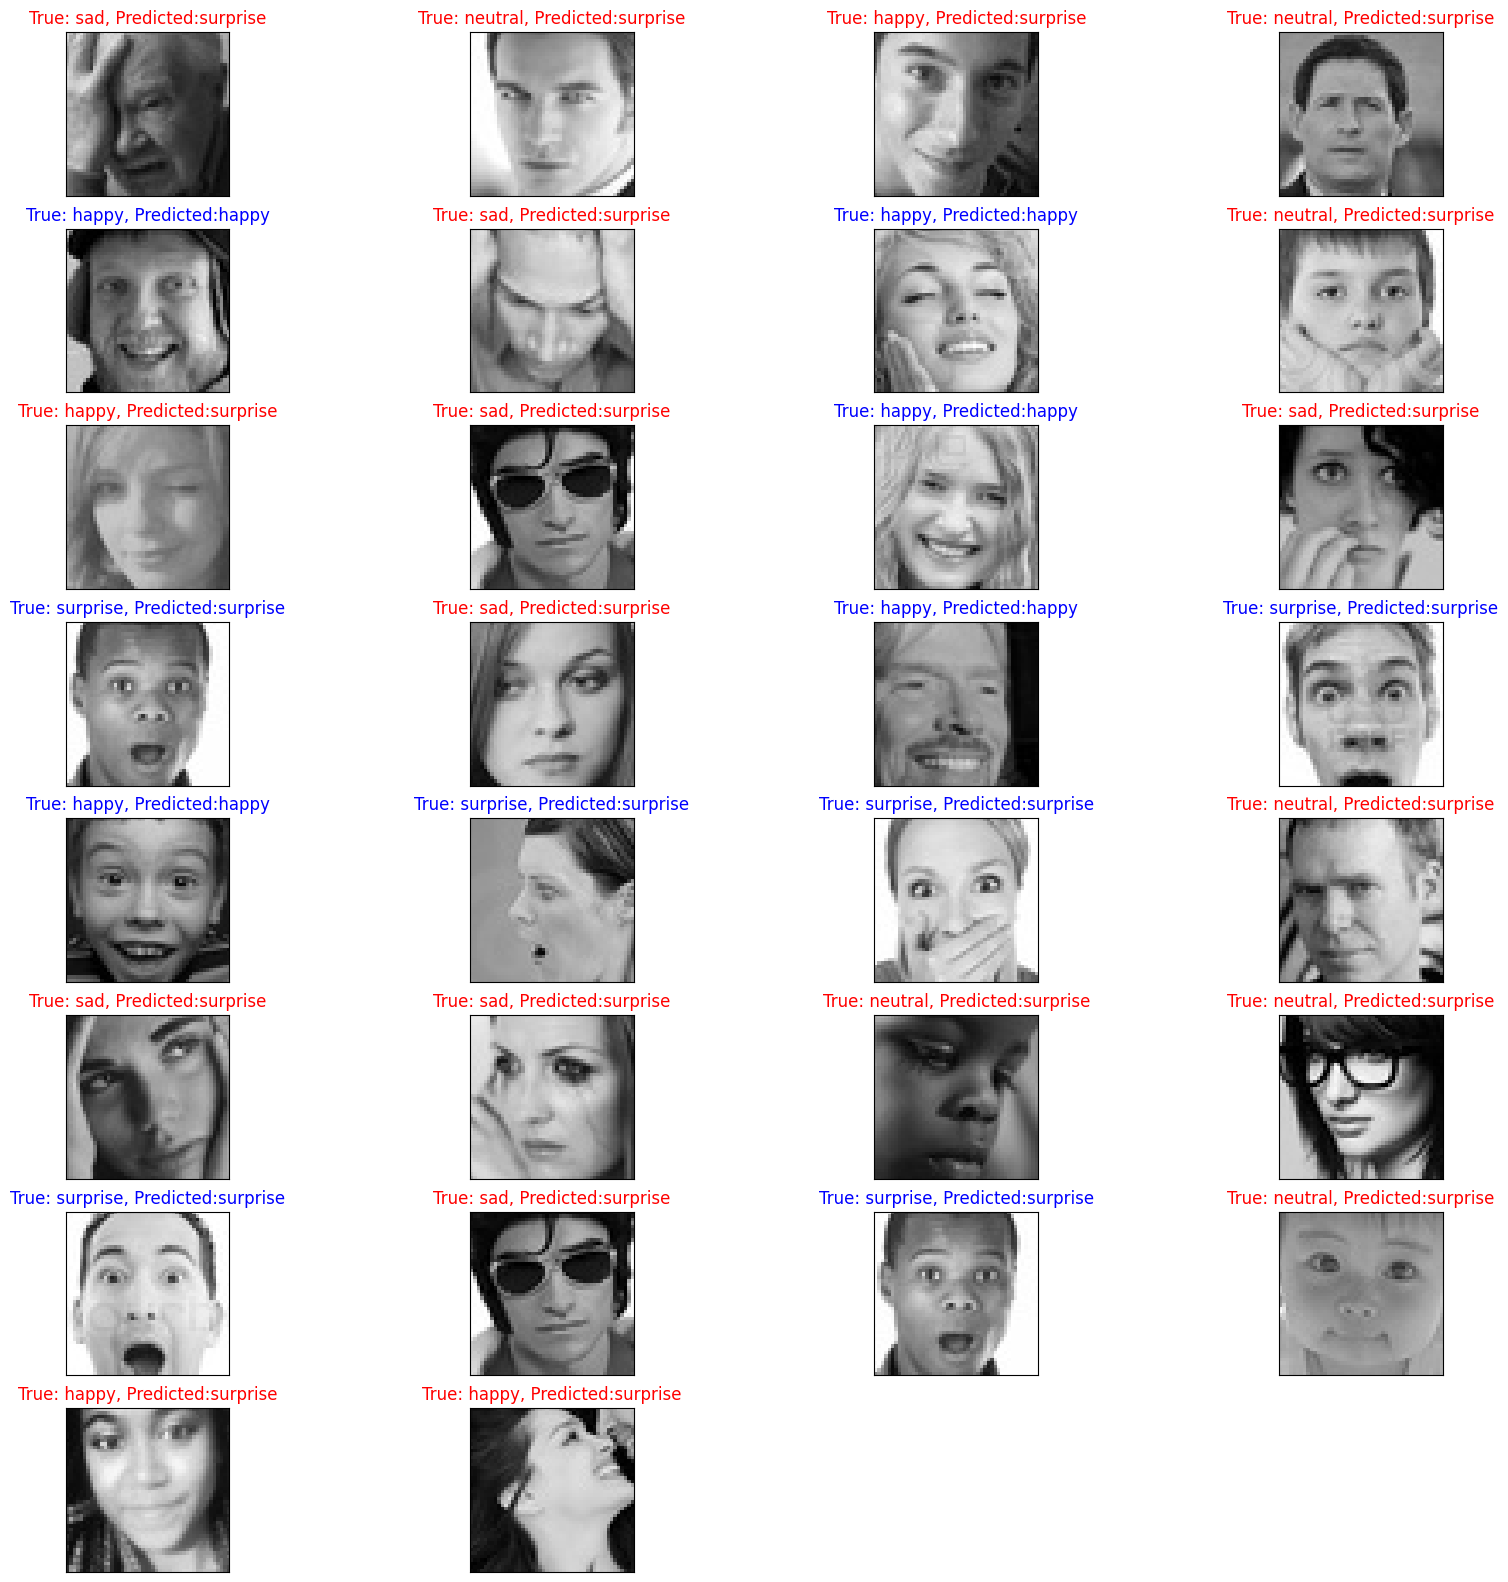

In [ ]:
test_model(cnn_model)

# Plots the CNN model graphically

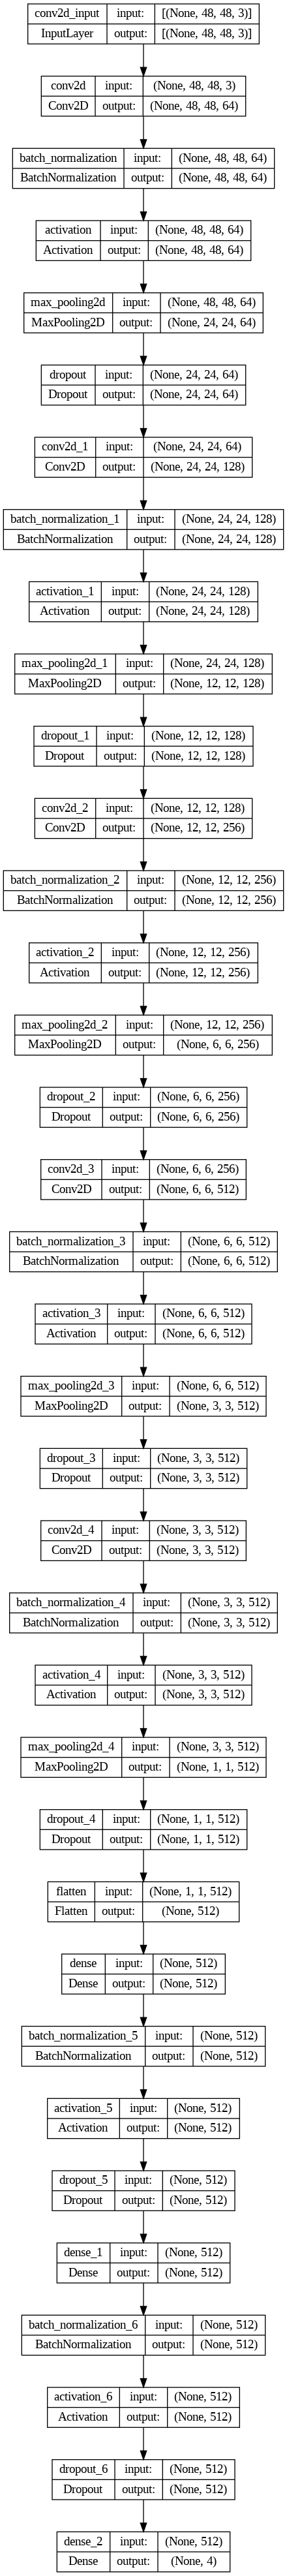

In [ ]:
from sklearn import set_config
from keras.utils import plot_model
set_config(display="diagram")
plot_model(cnn_model, to_file='cnn_model_diagram.png', show_shapes=True, show_layer_names = True)

# Performance comparision

**Provides comparsion of the validation accuracy and loss for the transfer learning models and the final CNN model**

In [ ]:
model_names = ["CNN", "ResNet50V2", "VGG16", "EfficientNet"]
accuracies = [0.7384, 0.6833, 0.7549, 0.6508]
loss = [0.6487, 0.8011, 0.6093, 0.8708]

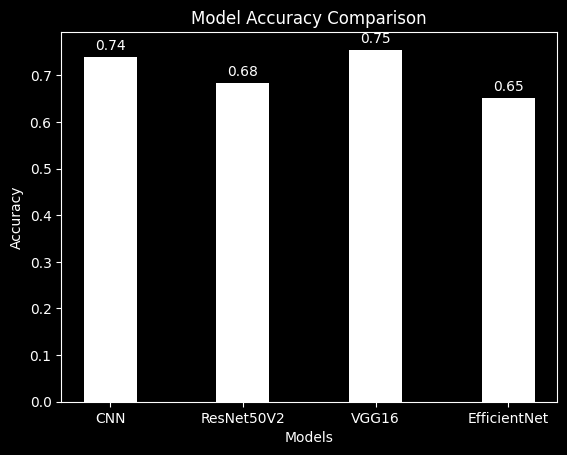

In [ ]:
plt.style.use('dark_background')
fig, ax = plt.subplots()
bars = ax.bar(model_names, accuracies, width=0.4, color='white')
plt.xlabel('Models', color='white')
plt.ylabel('Accuracy', color='white')
plt.title('Model Accuracy Comparison', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', color='white')
plt.show()

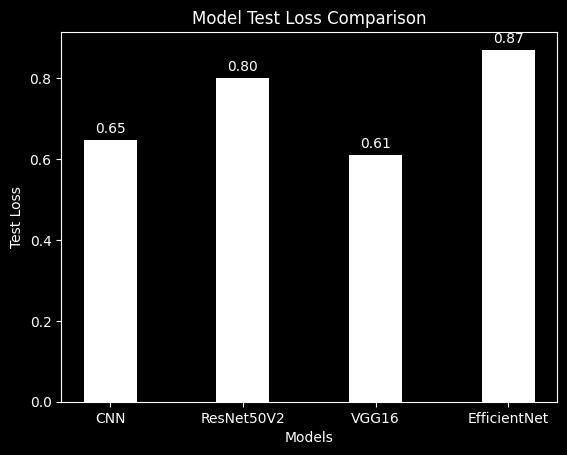

In [ ]:
plt.style.use('dark_background')
fig, ax = plt.subplots()
bars = ax.bar(model_names, loss, width=0.4, color='white')
plt.xlabel('Models', color='white')
plt.ylabel('Test Loss', color='white')
plt.title('Model Test Loss Comparison', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', color='white')
plt.show()

**Observations and Insights:__**

**Comparsion table of the results of the different models on its overall loss and accuracy**

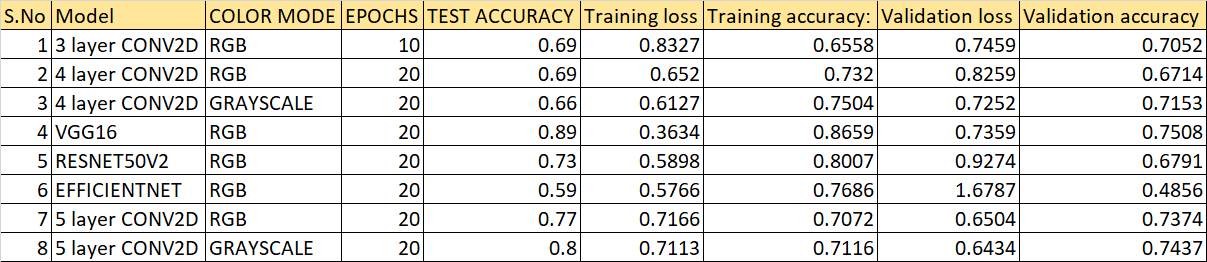

To compare the classification reports of the four models (Final CNN, EfficientNet, ResNet50V2, and VGG16), let's summarize their performance metrics in a tabular format:

| Model       | Precision (weighted avg) | Recall (weighted avg) | F1-Score (weighted avg) | Accuracy |
|-------------|--------------------------|-----------------------|--------------------------|----------|
| Final CNN | 0.78                     | 0.77                  | 0.77                     | 77%      |
| EfficientNet| 0.60                     | 0.59                  | 0.59                     | 59%      |
| ResNet50V2  | 0.80                     | 0.73                  | 0.74                     | 73%      |
| VGG16       | 0.89                     | 0.89                  | 0.89                     | 89%      |

### Insights from Comparison:

1. **Accuracy**:
   - VGG16 achieves the highest accuracy of 89%, followed by the Final CNN model with 77%. ResNet50V2 follows with 73%, and EfficientNet has the lowest accuracy at 59%.

2. **Precision (weighted avg)**:
   - VGG16 also leads in precision with 0.89, indicating high precision across all classes. Final CNN follows with 0.78, ResNet50V2 with 0.80, and EfficientNet with 0.60.

3. **Recall (weighted avg)**:
   - VGG16 and Final CNN tie for highest recall at 0.89 and 0.77 respectively. ResNet50V2 follows at 0.73, and EfficientNet has the lowest recall at 0.59.

4. **F1-Score (weighted avg)**:
   - VGG16 achieves the highest F1-score of 0.89, indicating excellent balance between precision and recall. Final CNN follows with 0.77, ResNet50V2 with 0.74, and EfficientNet with 0.59.

### Summary:
- **VGG16** emerges as the top performer across all metrics, demonstrating superior accuracy, precision, recall, and F1-score compared to the other models.
- **Fianl CNN** shows strong performance overall, particularly in precision and recall, but slightly lags behind VGG16.
- **ResNet50V2** performs reasonably well but shows room for improvement compared to VGG16 and Final CNN, especially in recall and overall accuracy.
- **EfficientNet** lags behind the other models in all metrics, indicating it may not be as suitable for this specific facial emotion detection task compared to the deeper architectures like VGG16 and ResNet50V2.

These observations highlight the importance of model architecture and complexity in achieving high performance in tasks like facial emotion detection, where nuances in feature extraction and representation play a crucial role.

## **Conclusion:**

Overall the final CNN model and VGG16 model overweights the others in terms of accuracy and precision. This model should be trained further with large datasets and provide front end design for continous learning if possible